

*   Nombre: Patricio Gonzalez
*   Seccion: 002D

*   RUT: 20.880.417-0





In [1]:
!pip install kneed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

df = pd.read_csv('video_games_sales.csv')

#Fase 1: Entendimiento del negocio

Este trabajo tiene como objetivo primeramente realizar un analisis de mercado a la venta de videojuegos a lo largo del tiempo, identificando el rendimiento que han tenido los diferentes generos de videojuegos, la tendencia de venta a medida que avanza la tecnologia, asi como tambien determinar las preferencias de los consumidores dependiendo la region.

Para entrar en contexto, los videojuegos a pesar de que no lo parezca, es una industria relativamente antigua que ha ido ganando fama de sus inicios con juegos como Spacewars! (1961) y Pong (1972). Pero fue en 1985 donde esta industria gano fuerza y se masifico a todos los hogares en paises como Japon y USA, es con la llegada de la Nintendo Entertainment System (NES) que es considerada la consola mas exitosa de la epoca y que marcaria el antes y un despues en los videojuegos. Luego de este exito esta consola (y las siguientes generaciones) se masificaron a Europa y America Latina, con esto el tamaño del mercado fue en aumento, y la competencia aumento consigo, trayendo grandes empresas como Sega y posteriormente en 1994 a Sony con su primera PlayStation. De todo esto podemos destacar que a lo largo de las generaciones de consolas nos hemos encontrado con innovaciones tecnologicas, cambios en las demandas de los consumidores y eventos economicos internos o externos a empresas importantes del sector.

En el dataset otorgado tenemos las siguientes categorias:


*   Name: Nombre del Videojuego
*   Platform: Plataforma - Consola

*   Year_of_Release: Año de lanzamiento
*   Genre: Genero del videojuego

*   Publisher: Es la empresa que distribuye el videojuego
*   NA_Sales: Ventas en la region de Norte America

*   EU_Sales: Ventas en la region de Europa
*   JP_Sales: Ventas en la region de Japon

*   Other_Sales: Ventas en otra region
*   Global_Sales: Ventas globales

*   Critic_Score: Puntuacion de la critica
*   Critic_Count: Cantidad de puntuaciones realizadas

*   User_Score: Puntuacion de los usuarios
*   User_Count: Cantidad de puntuaciones realizadas por el usuario

*   Developer: El desarrollador a cargo del videojuego
*   Rating: La clasificacion de edad del Videojuego

















Metricas claves y KPIs claves para el negocio:


*   Ventas globales y regionales por año
*   Ventas por plataforma

*   Ventas por genero
*   Ventas por Critic Score





#Fase 2: Entendimiento de los datos

In [3]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [4]:
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Podemos observar que el data set cuenta con muchos datos nulos en la puntuacion de la critica y los usuarios, asi como en su rating y desarrollador. Sin un analisis profundo puedo formular una hipotesis, y esto es provocado por los videojuegos lanzados antes de los 2000 debido a la tecnologia la critica no estaba tan profundizada en esta area de los videojuegos. tambien lo podemos visualizar en el grafico.

In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

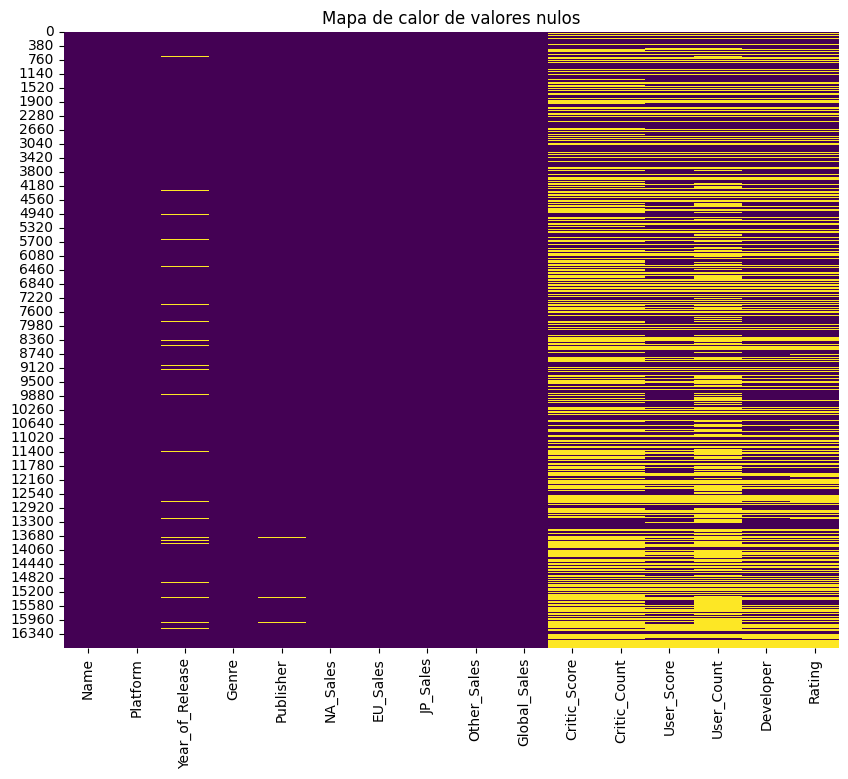

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [8]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

Aqui podemos observar que la mayoria de los videojuegos se concentra en juegos de accion y deportes. Esto se debe porque en este mercado los juegos con estos generos atraen la atencion del publico joven-adulto.

In [9]:
df['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [10]:
# Calcular el número de valores nulos por año
nulos_por_año = df.groupby('Year_of_Release').apply(lambda x: x.isnull().sum())

# Sumar el número de valores nulos por año
total_nulos_por_año = nulos_por_año.sum(axis=1)

# Ordenar los años por el total de valores nulos en orden descendente
años_con_mas_nulos = total_nulos_por_año.sort_values(ascending=False)
print(años_con_mas_nulos)

Year_of_Release
2010.0    3664
2009.0    3591
2008.0    3514
2011.0    3170
2007.0    2707
2006.0    2210
1998.0    2091
2015.0    1900
2012.0    1851
1999.0    1796
2005.0    1629
1997.0    1623
2014.0    1589
1996.0    1531
2013.0    1456
2016.0    1400
1995.0    1314
2002.0    1290
2000.0    1259
2004.0    1186
2003.0    1127
2001.0     966
1994.0     720
1993.0     376
1981.0     276
1992.0     250
1991.0     246
1982.0     216
1986.0     126
1983.0     102
1989.0     102
1987.0      96
1990.0      96
1984.0      84
1988.0      84
1985.0      78
1980.0      54
2017.0      18
2020.0       3
dtype: int64


De estos graficos de caja podemos analizar que la mayoria ventas cuenta con problemas de valores atipicos en sus datos.

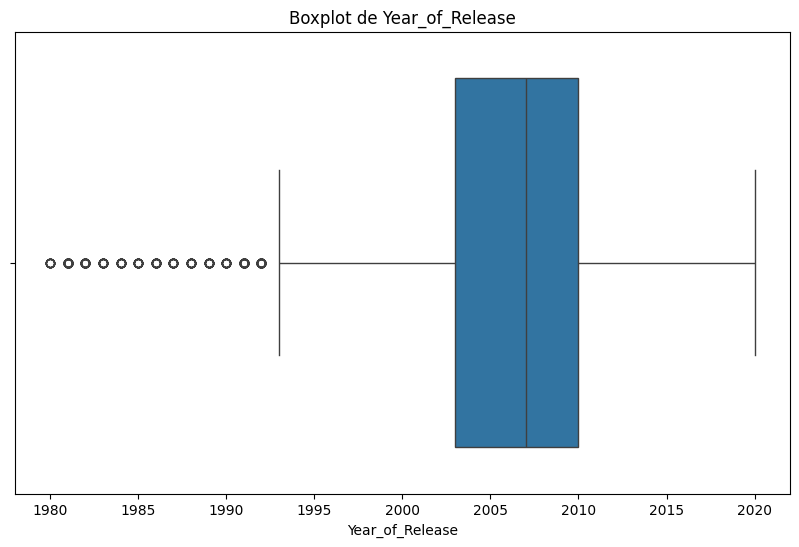

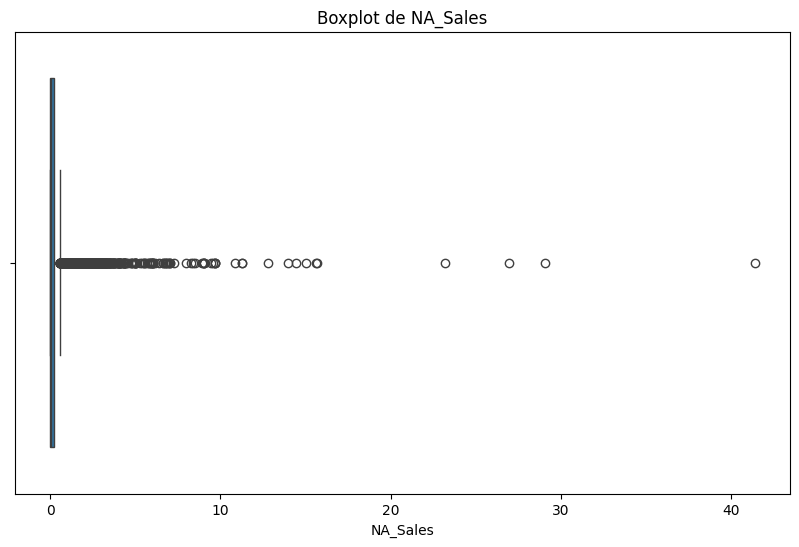

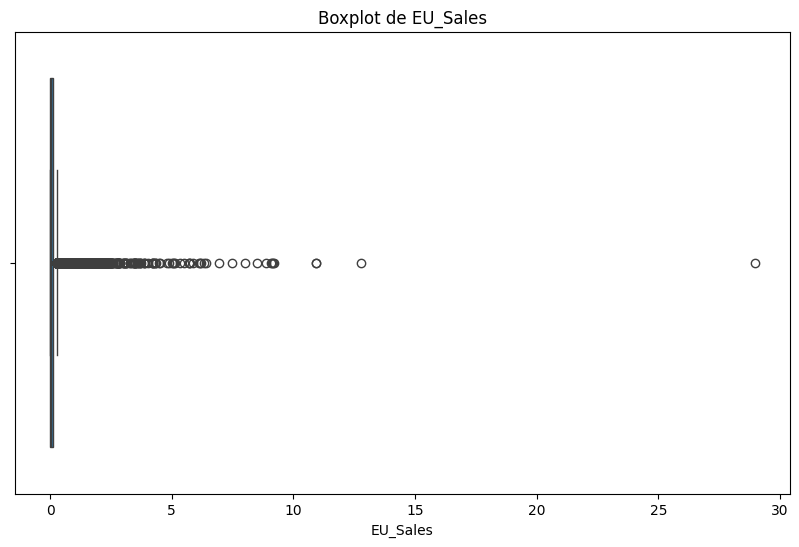

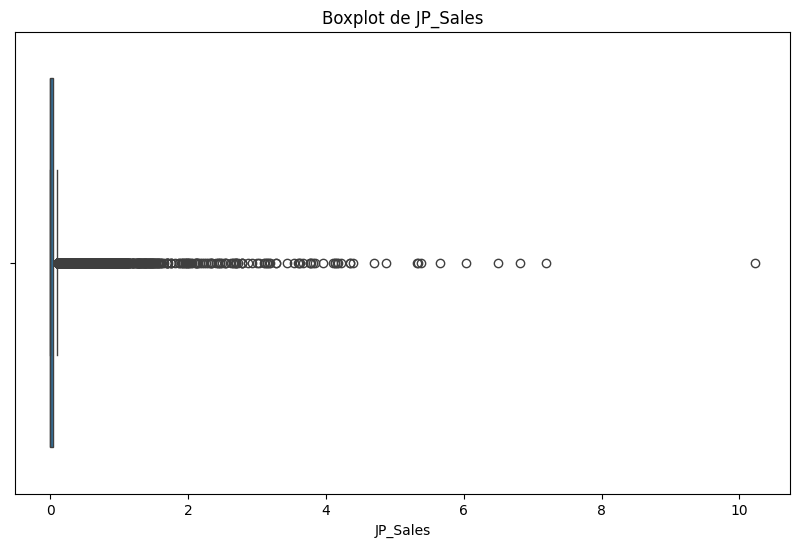

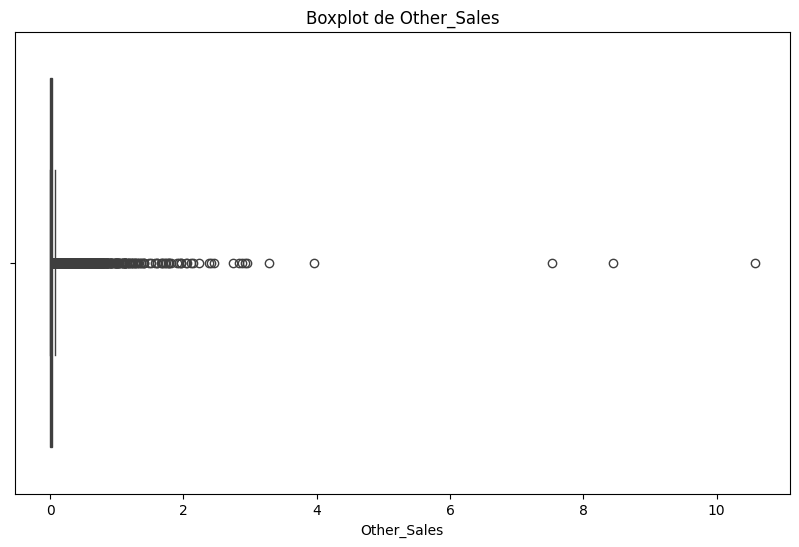

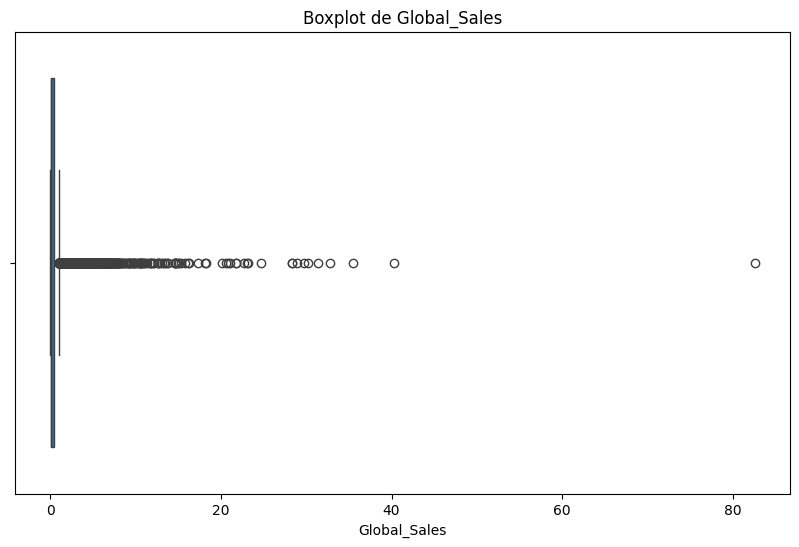

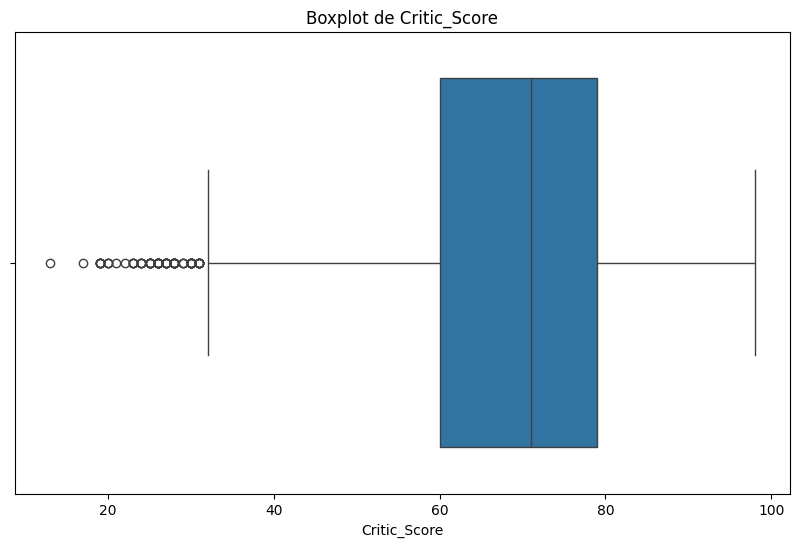

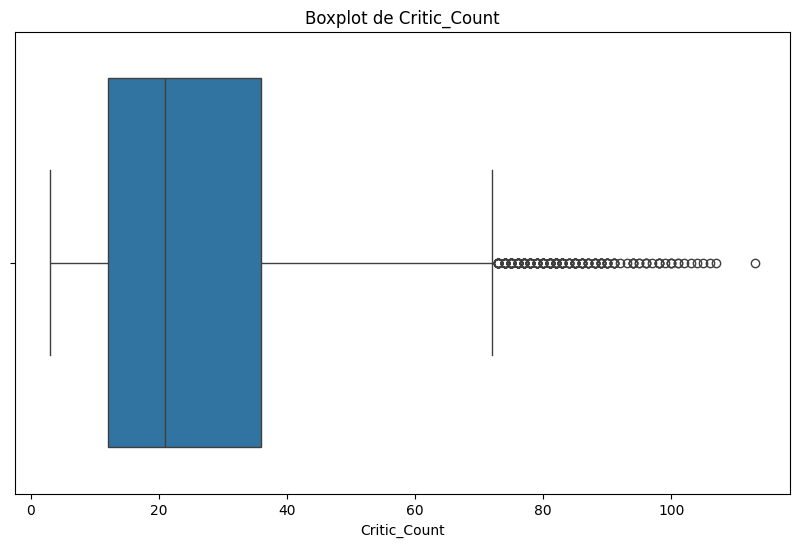

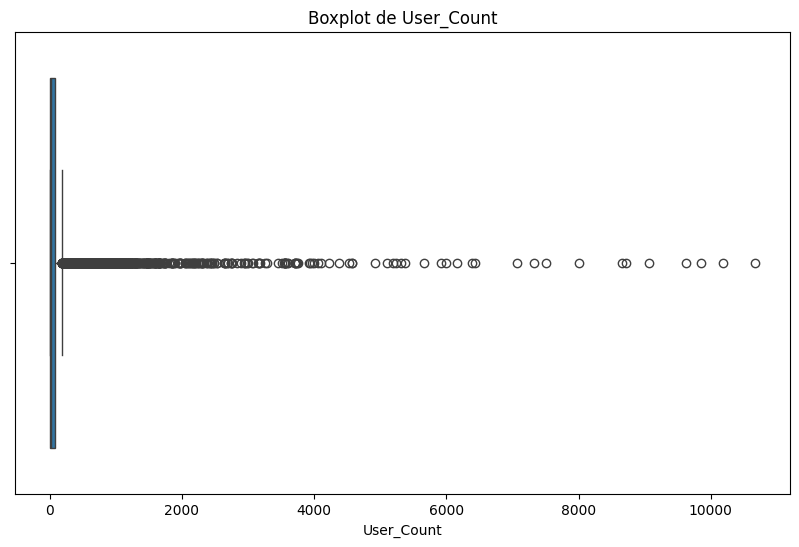

In [11]:
# Filtrar las columnas que son de tipo float64
float_columns = df.select_dtypes(include=['float64']).columns

# Crear un boxplot para cada columna de tipo float64
for col in float_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

###Ventas Globales

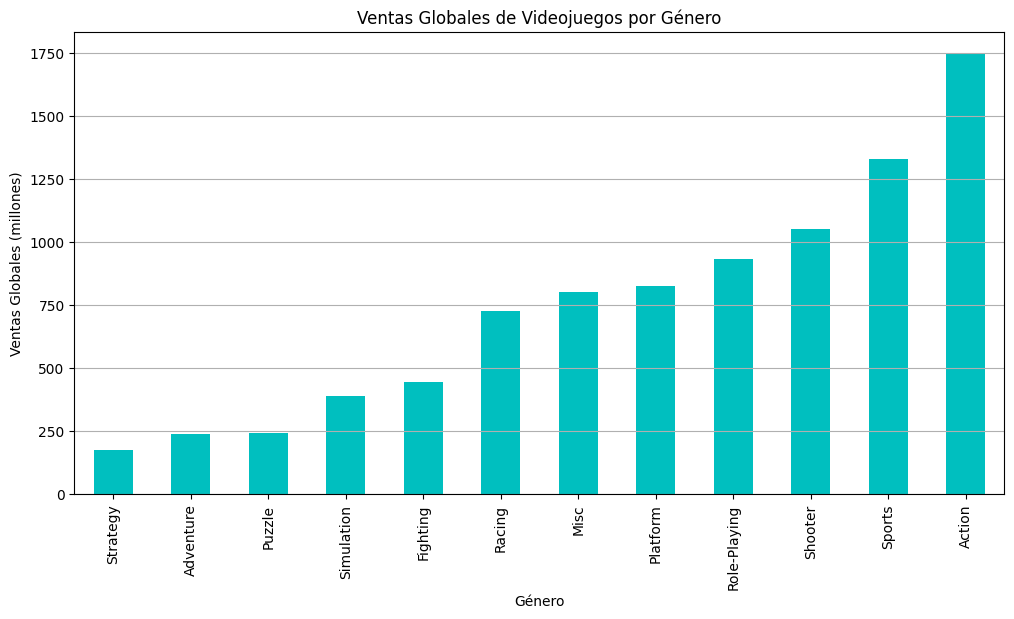

In [12]:
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_por_genero.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

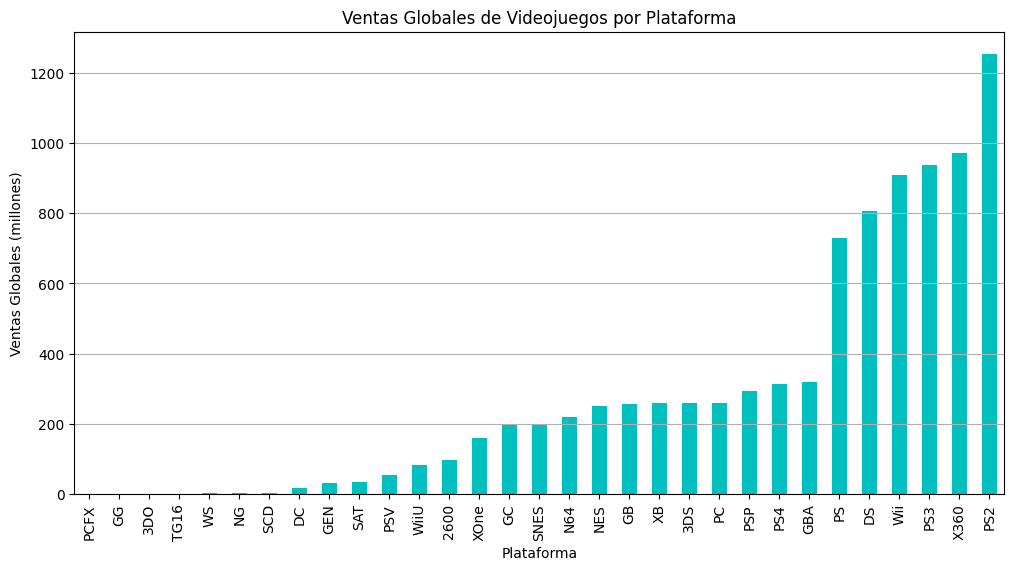

In [13]:
ventas_globales_por_plataforma = df.groupby('Platform')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_globales_por_plataforma.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

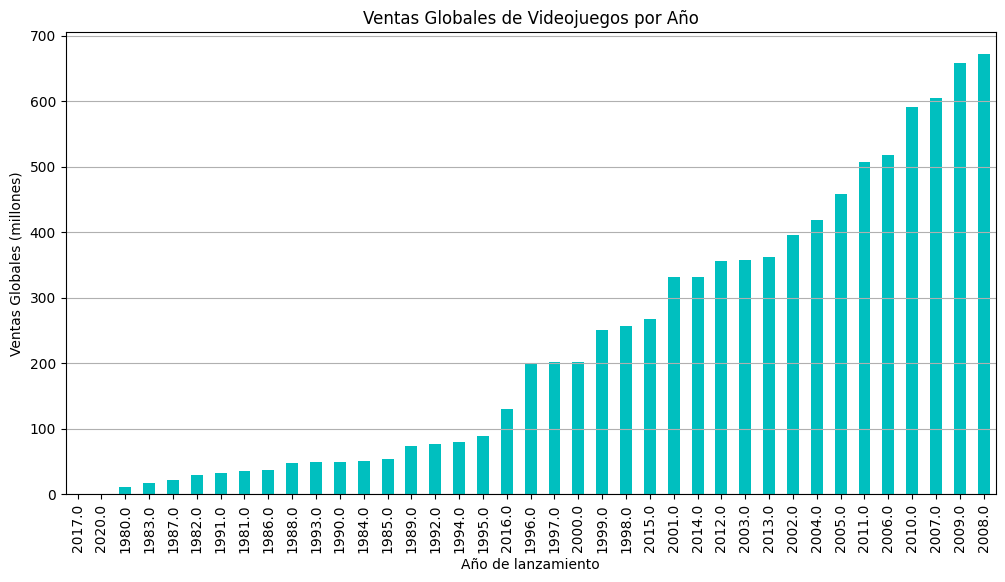

In [14]:
ventas_globales_por_año = df.groupby('Year_of_Release')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_globales_por_año.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

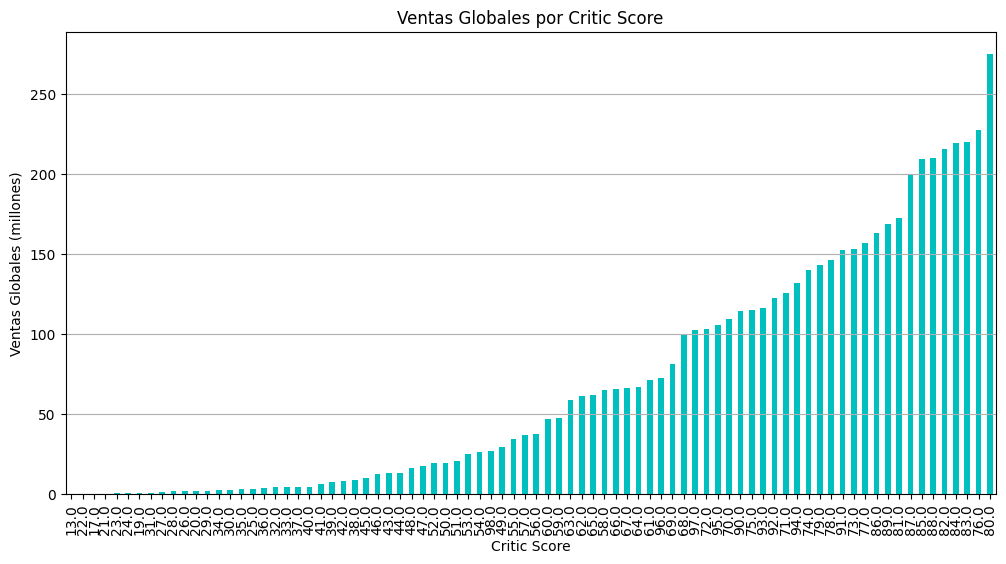

In [15]:
ventas_globales_critic_score = df.groupby('Critic_Score')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_globales_critic_score.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales por Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

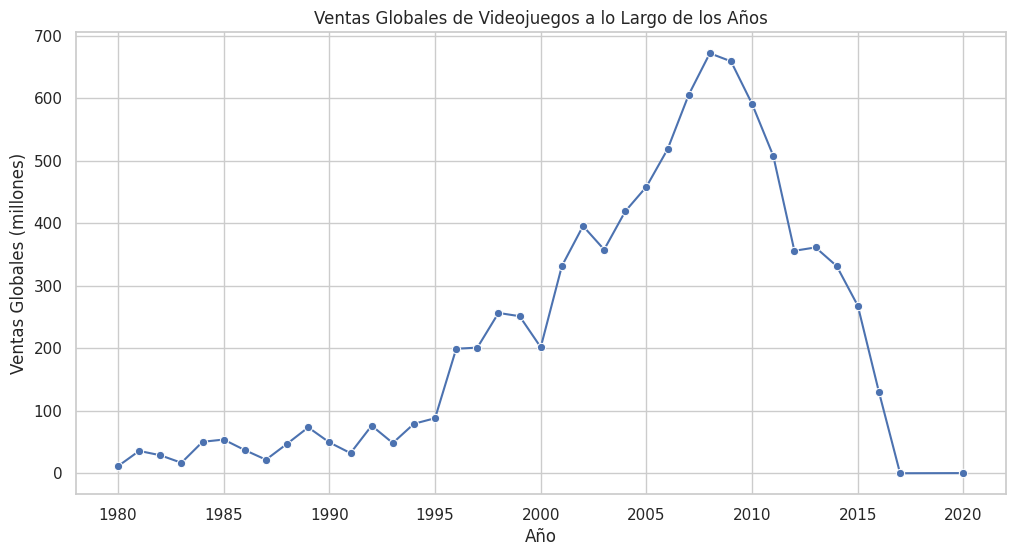

In [16]:
ventas_globales = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_globales, x='Year_of_Release', y='Global_Sales', marker='o')

plt.title('Ventas Globales de Videojuegos a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()


###Ventas por region

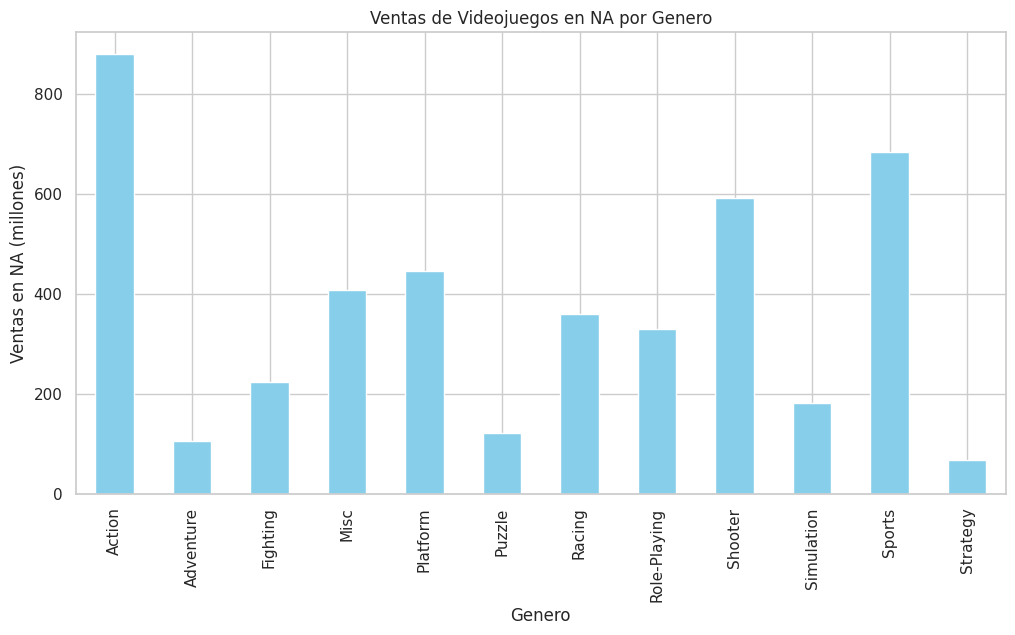

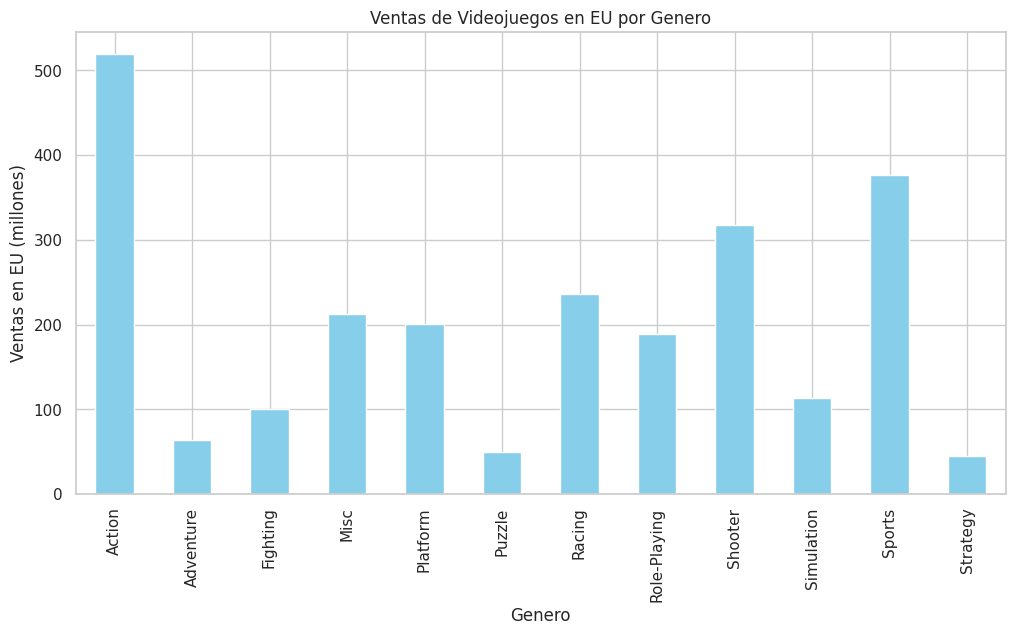

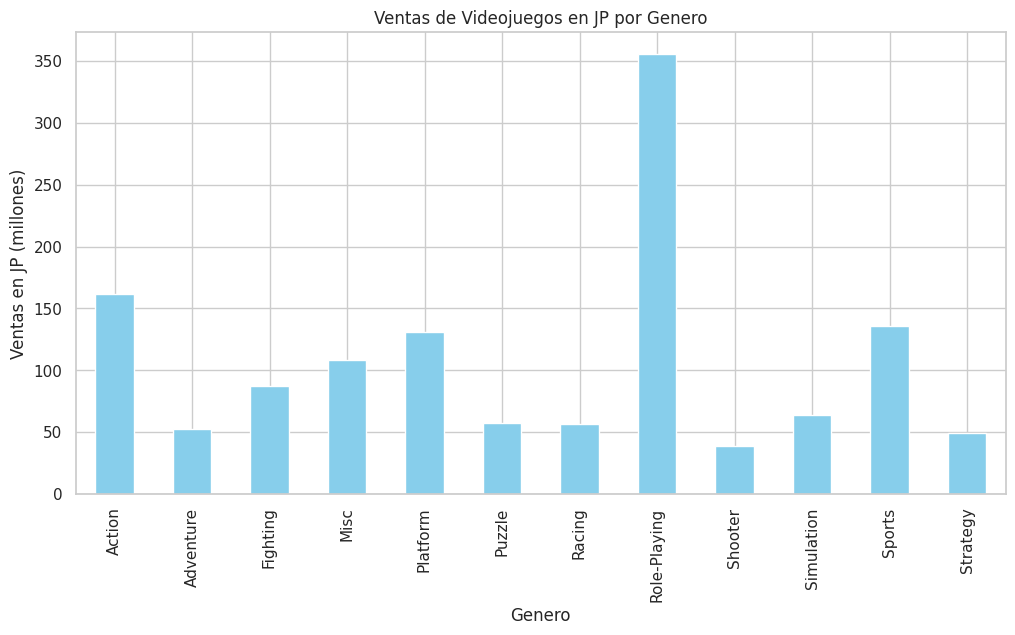

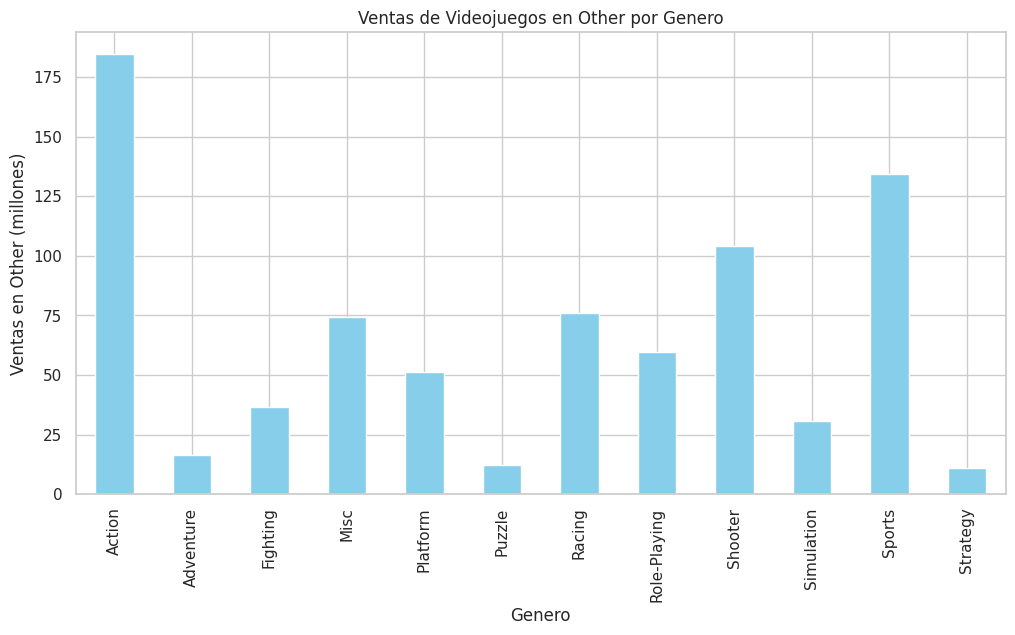

In [17]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Genre')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Genero')
    plt.xlabel('Genero')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

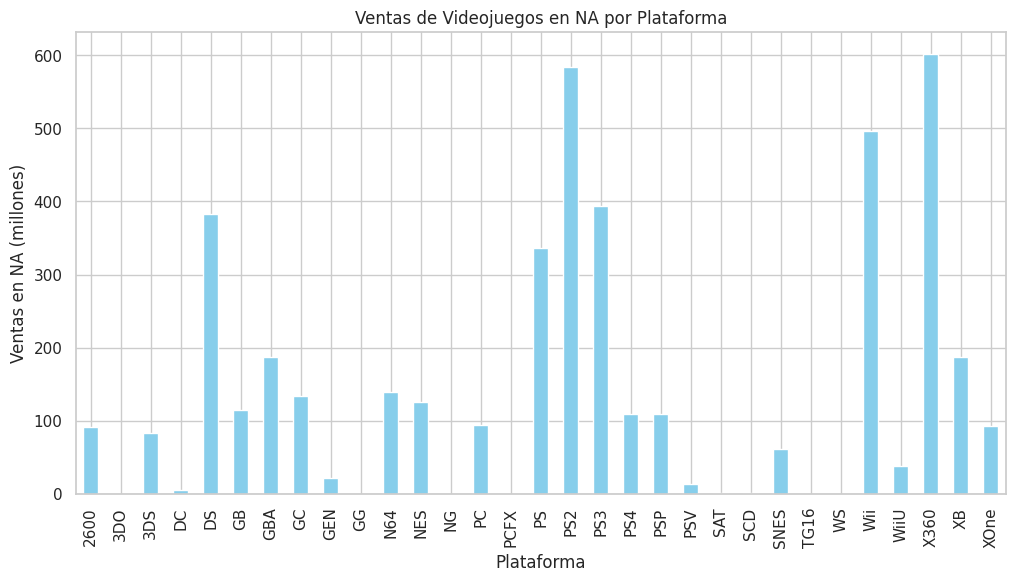

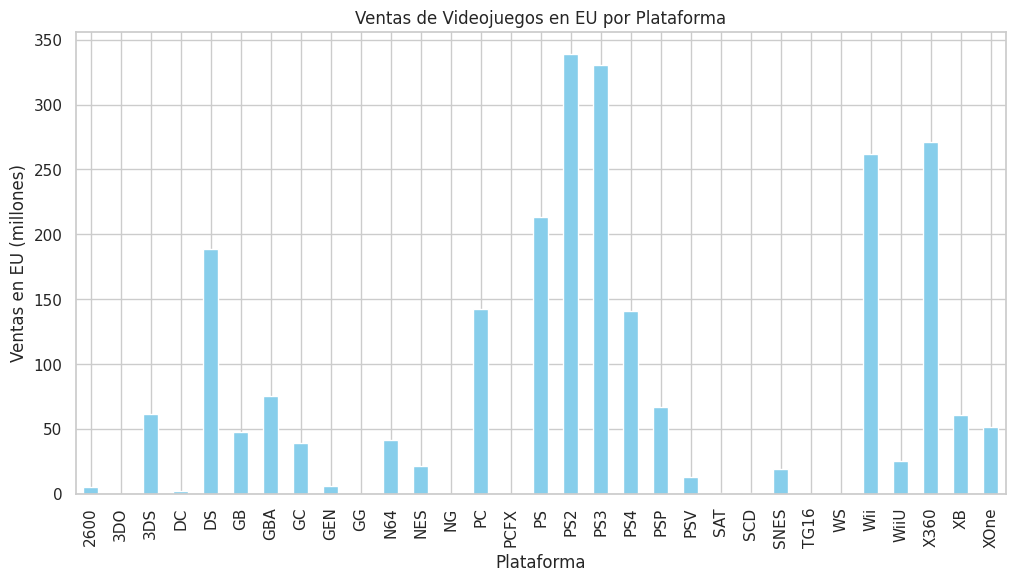

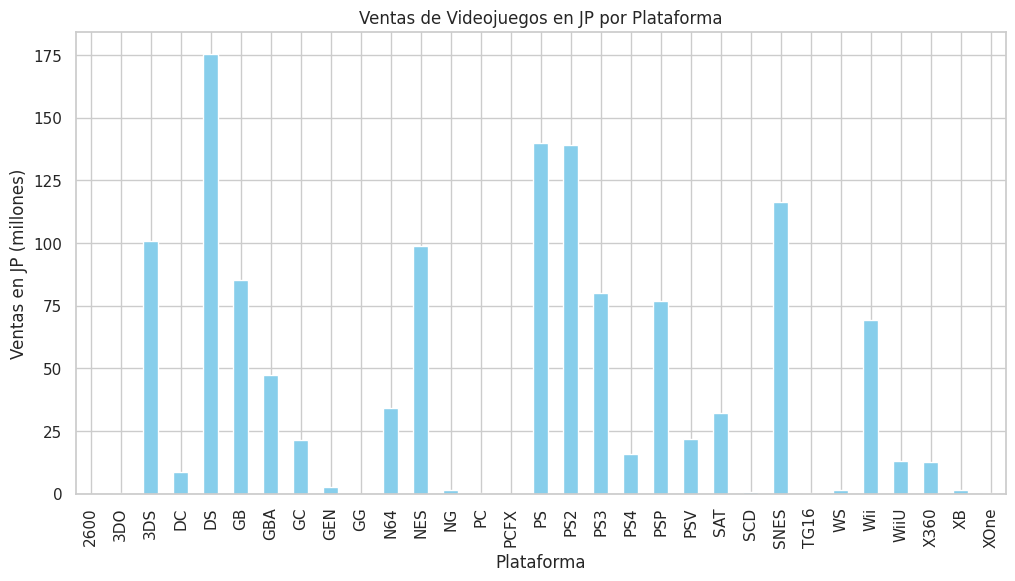

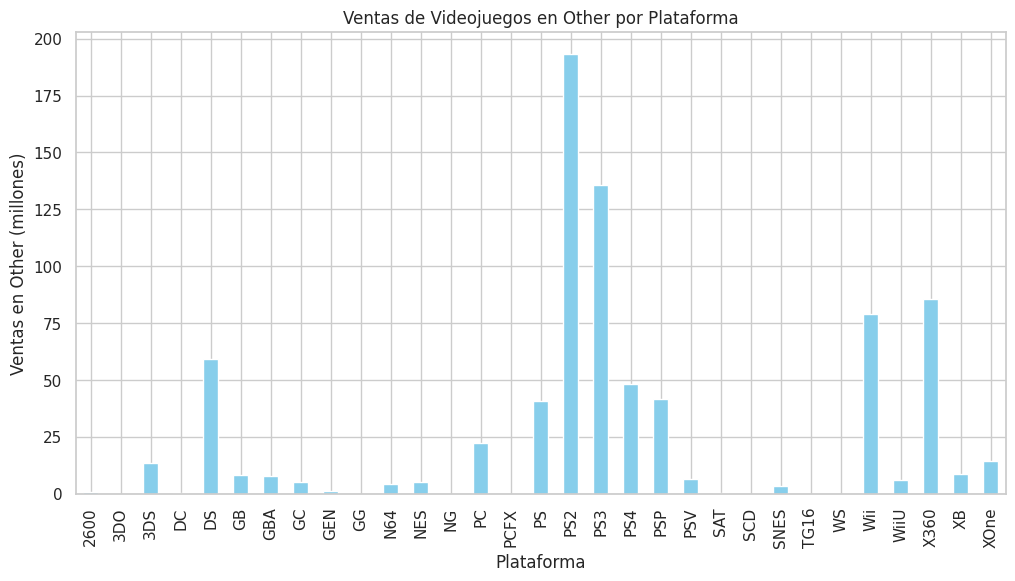

In [18]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Platform')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

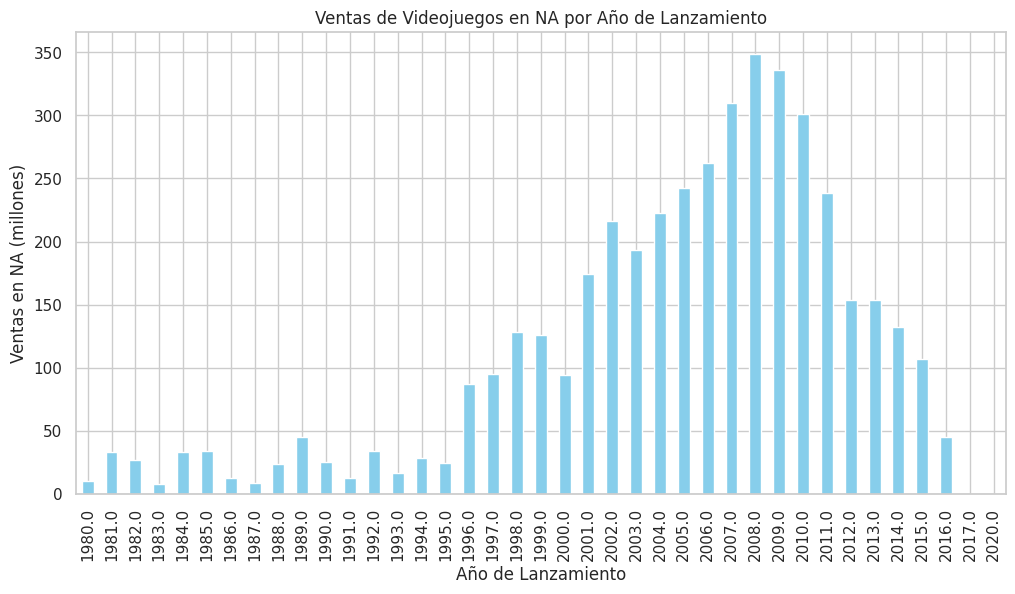

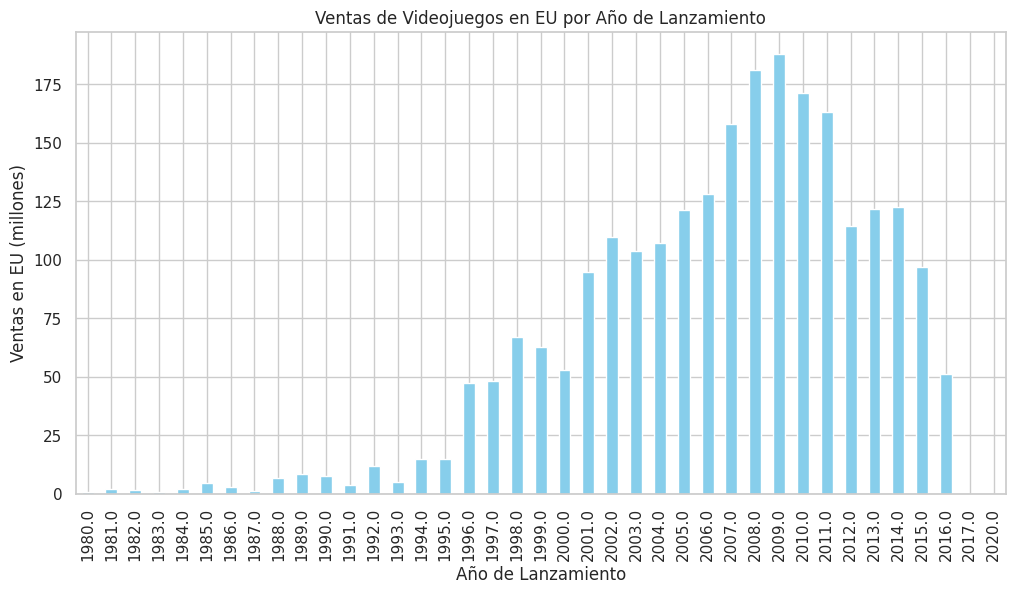

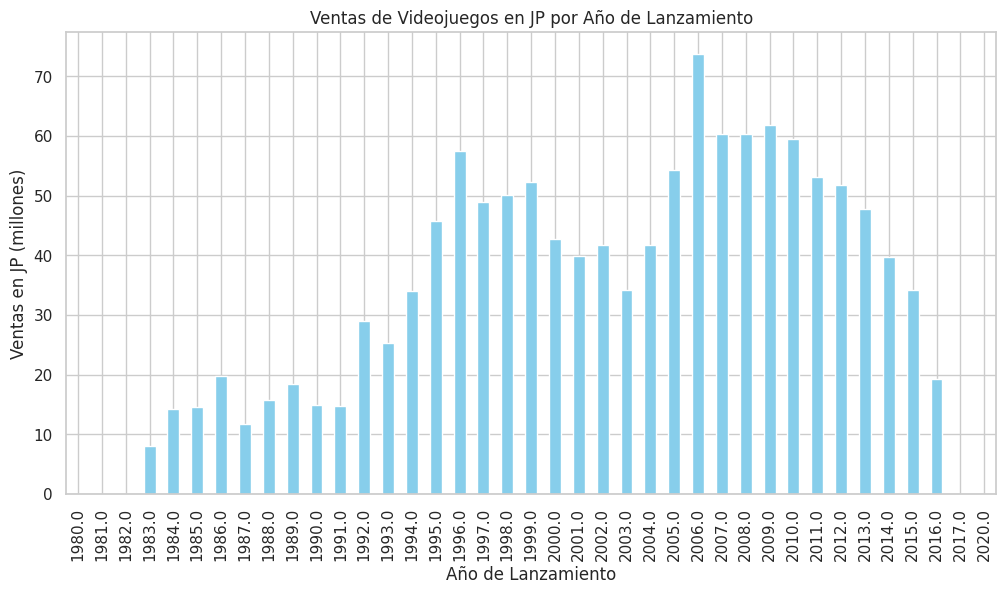

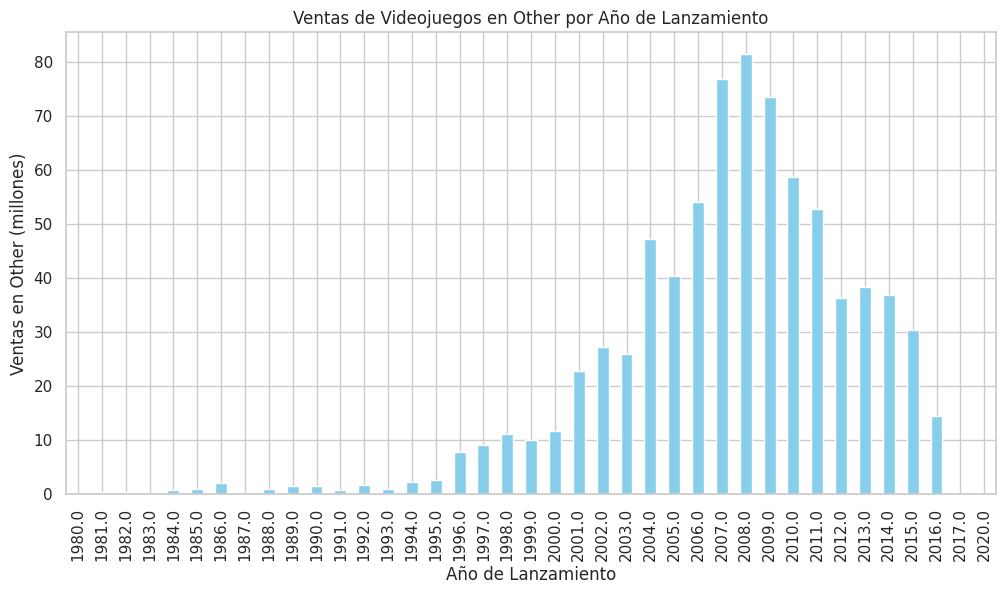

In [19]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Year_of_Release')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Año de Lanzamiento')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

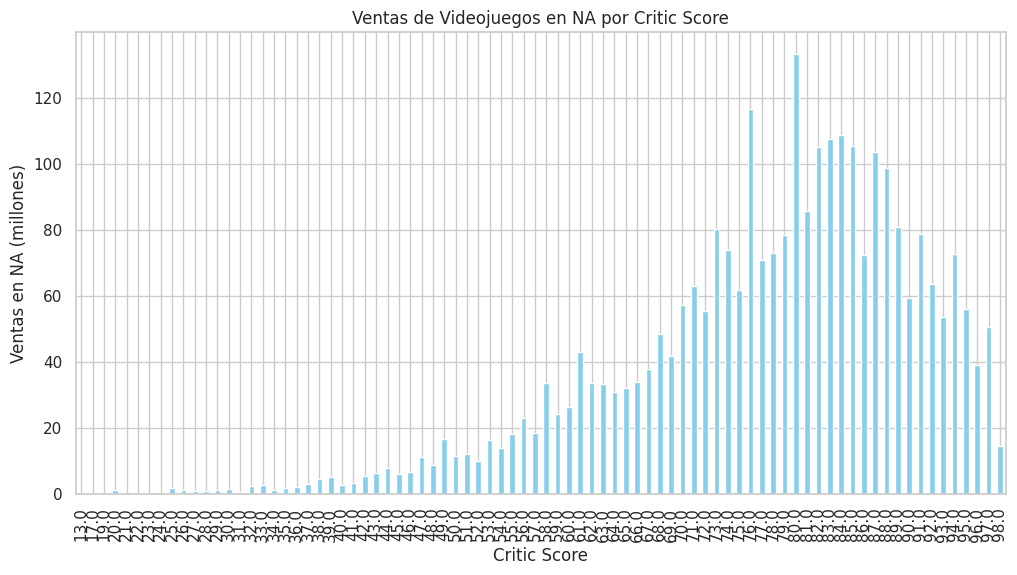

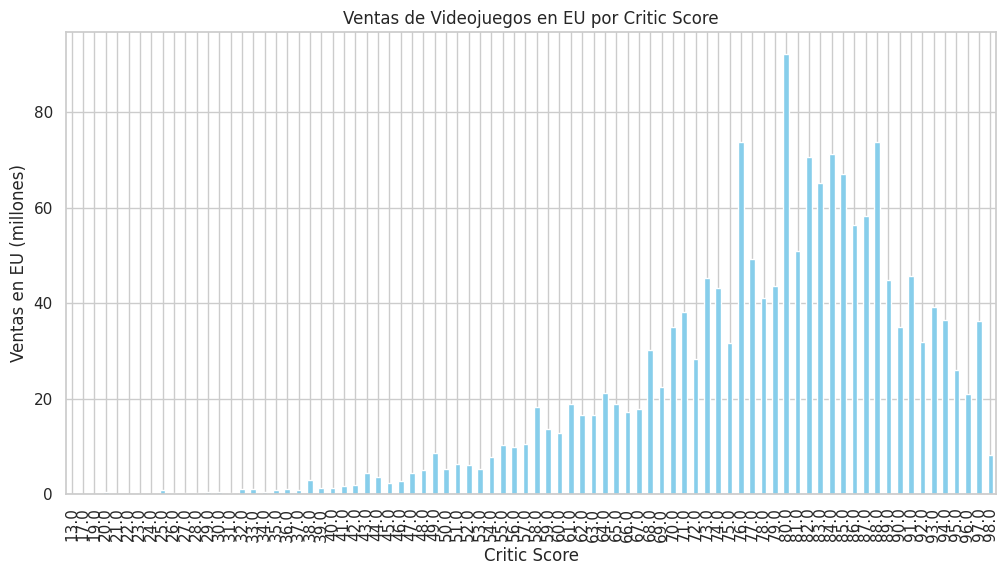

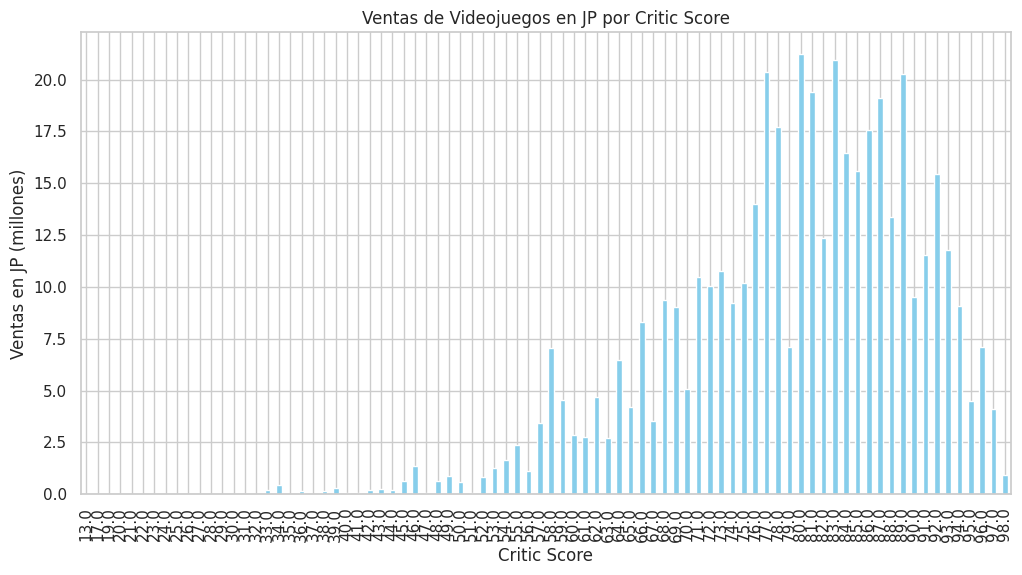

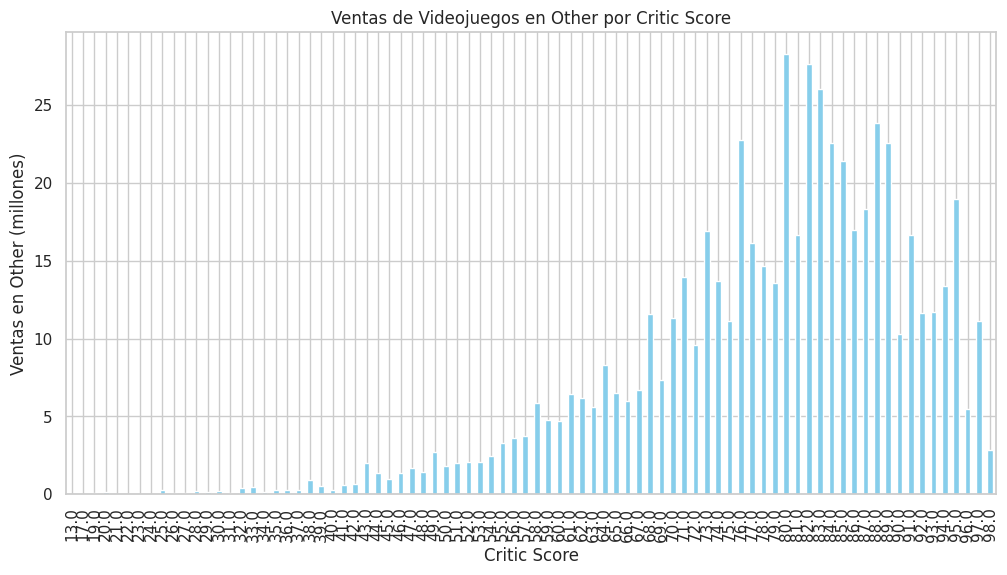

In [20]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Critic_Score')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Critic Score')
    plt.xlabel('Critic Score')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

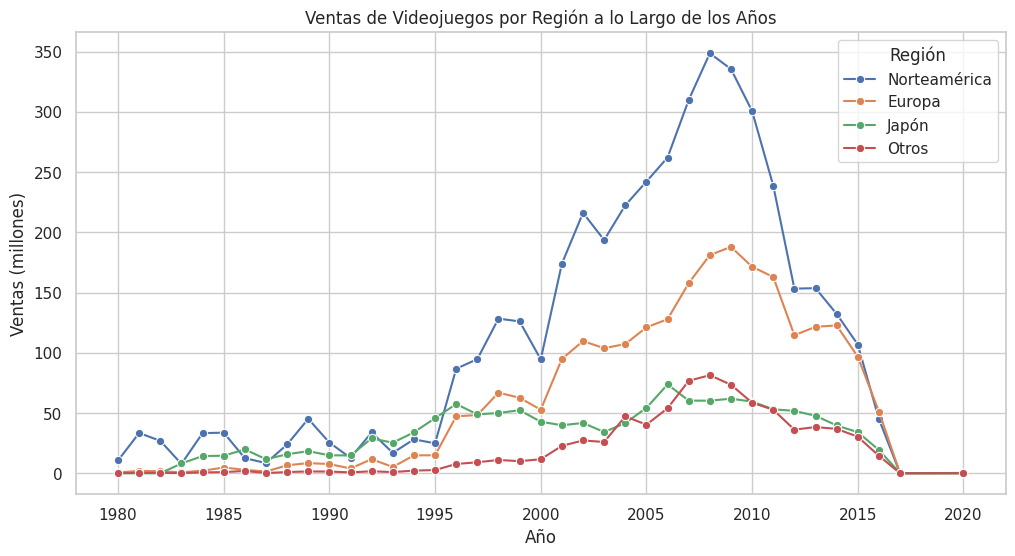

In [21]:
# Agregar las ventas por región y año
regional_sales = df.groupby(['Year_of_Release']).sum().reset_index()
plt.figure(figsize=(12, 6))
# Crear un gráfico para cada región
sns.lineplot(data=regional_sales, x='Year_of_Release', y='NA_Sales', marker='o', label='Norteamérica')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='EU_Sales', marker='o', label='Europa')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='JP_Sales', marker='o', label='Japón')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='Other_Sales', marker='o', label='Otros')
plt.title('Ventas de Videojuegos por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.grid(True)
plt.show()


###Mapa de Correlacion

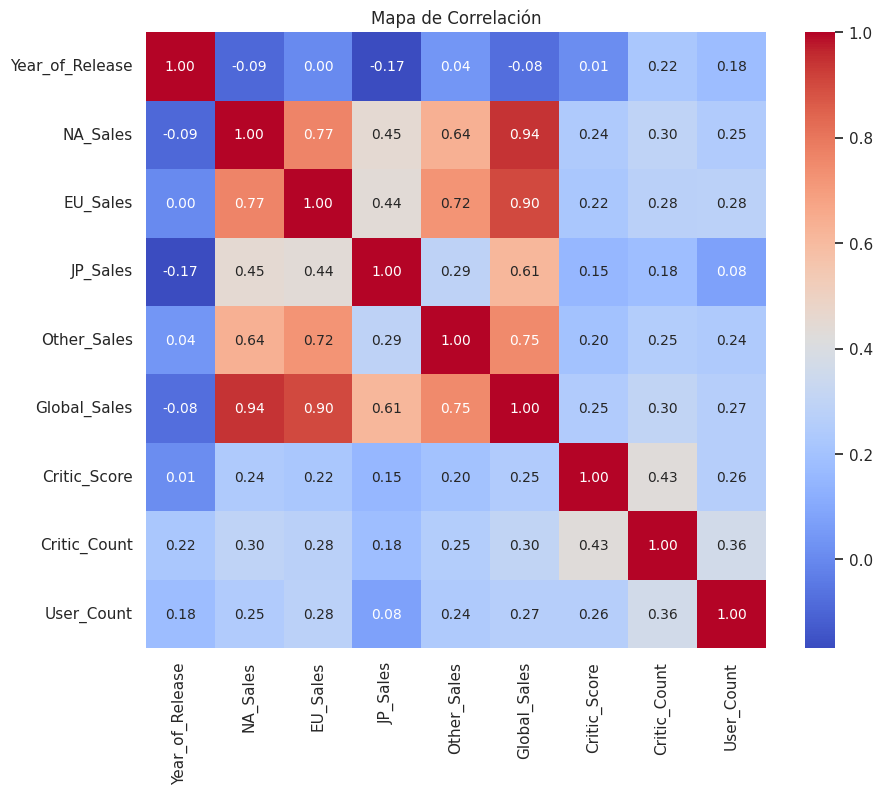

In [22]:
heatmap = df.select_dtypes([int, float]).corr()
#Mapa de Correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Correlación')
plt.show()

#Fase 3: Preparacion de los Datos

Se realiza tratamiento a outliers para que se posicionen entre sus primer y tercer cuartil.

In [23]:
def imputar_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df

df_imputados = imputar_outliers(df, df.select_dtypes(include=[float, int]).columns)

# Función para contar outliers en una serie
def contar_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = serie[(serie < lower_bound) | (serie > upper_bound)]
    return len(outliers)

# Lista para almacenar el conteo de outliers por columna
outliers_conteo = {}

# Contar outliers en todas las columnas numéricas
for column in df.select_dtypes(include=[float, int]).columns:
    outliers_conteo[column] = contar_outliers(df[column])

# Mostrar el conteo de outliers por columna
print(outliers_conteo)

{'Year_of_Release': 0, 'NA_Sales': 0, 'EU_Sales': 0, 'JP_Sales': 0, 'Other_Sales': 0, 'Global_Sales': 0, 'Critic_Score': 0, 'Critic_Count': 0, 'User_Count': 0}


Decidi reemplazar tbd (To be Determinated) por nulos, para posteriormente ser imputados por knn, y en un futuro pueda ser utilizado para modelos no supervisados.

In [24]:
#Convertir "tbd" a NaN en la columna User_Score
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

#Cambiar la columna User_Score a tipo float
df['User_Score'] = df['User_Score'].astype(float)

Se borran nulos insignificantes y sin importancia para el dataset, en las siguientes variables.

In [25]:
df = df.dropna(subset=['Genre', 'Year_of_Release', 'Publisher'])

Se rellenan los nulos con 'Unknown' para su tratamiento.

In [26]:
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

<ipython-input-26-2432473a2fcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Developer'].fillna('Unknown', inplace=True)
<ipython-input-26-2432473a2fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'].fillna('Unknown', inplace=True)


Se realiza estandarizacion a las variables para que tengan un promedio de 0 y una desviacion estandar de 1, esto para que se realice una imputacion de mejor calidad.

In [27]:
#Se seleccionan las variables numericas
df_numericos = df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 'Critic_Score', 'User_Score', 'User_Count']]

#Se crea el escalador
escalador = preprocessing.StandardScaler()

#Se realiza el escalado a las variables numericas
df_escalado = escalador.fit_transform(df_numericos)

Se realiza imputacion por genero para mejorar la calidad del dataset, para que haya una cohesion en la imputacion.

In [28]:
#Se obtienen los generos
generos = df['Genre'].unique()

#Se crea el KNNImputer
imputer = KNNImputer(n_neighbors=5)

#Bucle for que recorre los generos
for genre in generos:
    #Se filtra el df por genero
    genre_filtrado = df['Genre'] == genre
    df_genre = df.loc[genre_filtrado, ['Critic_Count', 'Critic_Score', 'User_Count', 'User_Score']]

    #Se valida que haya nulos
    if df_genre.isnull().any().any():
        #Se realiza la imputacion
        df_imputado = imputer.fit_transform(df_genre)

        #Se convierte a df
        df_imputado = pd.DataFrame(df_imputado, columns=df_genre.columns, index=df_genre.index)

        #Se reemplazan las columnas originales con los valores imputados
        df.loc[genre_filtrado, ['Critic_Count', 'Critic_Score', 'User_Count', 'User_Score']] = df_imputado

#Se imprime el resultado
print("\nDf con imputación por KNN en las columnas numéricas:")
print(df.head())




Df con imputación por KNN en las columnas numéricas:
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1992.5      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0       0.6     0.275       0.1        0.075         1.085     76.000000   
1       0.6     0.275       0.1        0.075         1.085     68.151020   
2       0.6     0.275       0.1        0.075         1.085     82.000000   
3       0.6     0.275       0.1        0.075         1.085     80.000000   
4       0.6     0.275       0.1        0.075         1.085     72.655267   

  

Se realiza un redondeo a 1 decimal a la variable critic_score para que no hayan datos con decimales muy largos.

In [29]:
# Redondear los resultados a 1 decimal solo para la columna 'Critic_Score'
df['Critic_Score'] = np.round(df['Critic_Score'], decimals=1)

<ipython-input-29-b8416f079a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critic_Score'] = np.round(df['Critic_Score'], decimals=1)


Podemos observar que los nulos han sido completamente tratados.

In [30]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

#Ventas globales despues de tratamiento de datos

En las ventas globales de videojuegos podemos analizar que los 3 generos de videojuegos mas vendidos son Action, Sports y Shooter. Esto se debe a que estos 3 generos son mas populares en las regiones de NA, EU y AL haciendo popular a estos generos juegos como Call of Duty, Fifa y GTA SA.

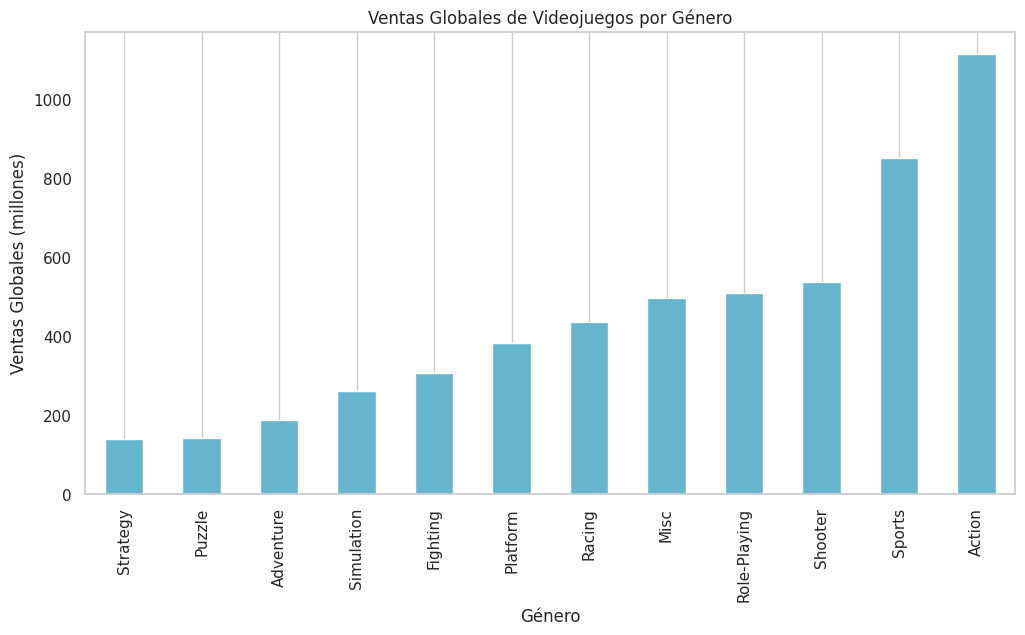

In [31]:
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_por_genero.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

Aqui podemos analizar que los videojuegos mas vendidos por plataforma son la PS2, Xbox360 y asumo que producto de los nulos en estos puestos se deberian encontrar las consolas de la Nintendo DS y la Wii, que tuvieron un alto impacto en el mercado. La ps2 es la mas alta producto de que ha sido la consola mas vendida en la historia con 155 millones de unidades.

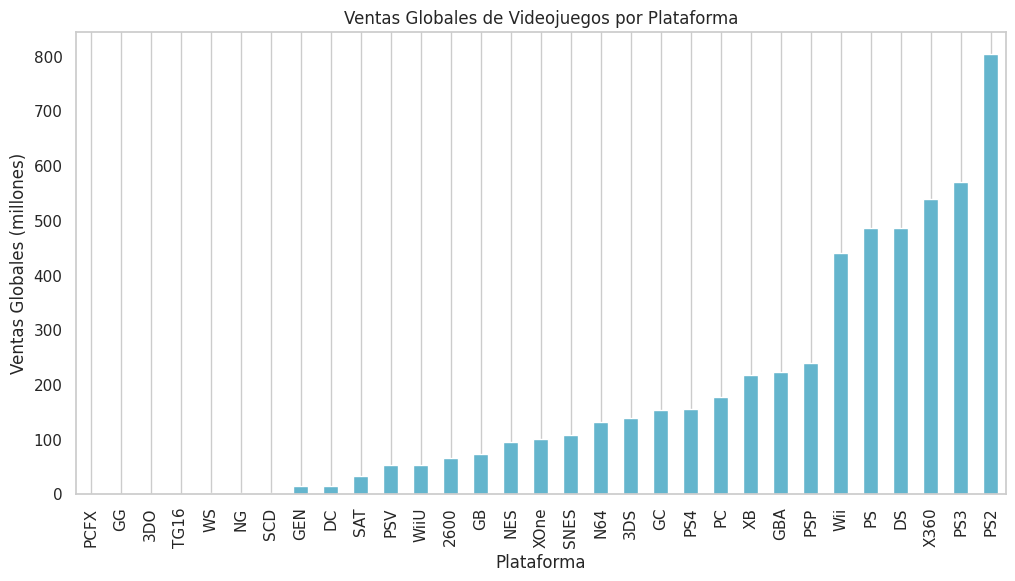

In [32]:
ventas_globales_por_plataforma = df.groupby('Platform')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_globales_por_plataforma.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

En el siguiente grafico podemos analizar que los años con mas videojuegos vendidos, tenemos los años 2007, 2008 y 2009. Estos años calzan con la salida de la septima generacion de consolas y con la salida de grandiosos juegos como Halo 3 que fue un exito para la Xbox 360, Fallout 3 y Gears of war. Si bien se debe al salto tecnologico y grafico de la septima generacion, tambien se debe a la masificacion de las consolas. Con esto quiero decir que los años anteriores tengan peores juegos o peores consolas, sino que las consolas y los videojuegos no estaban tan masificados como a la entrada de la septima generacion.

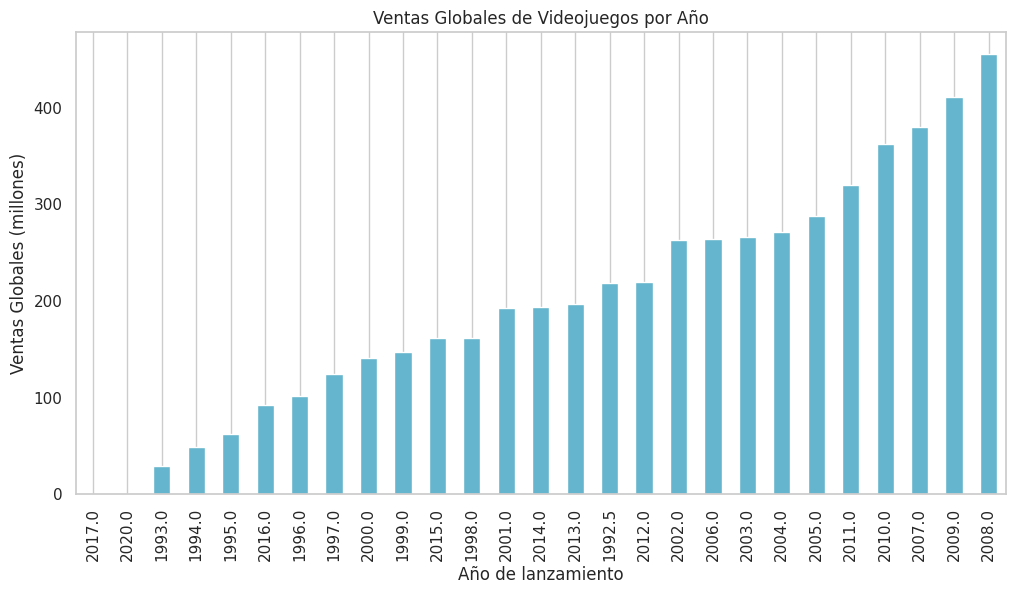

In [33]:
ventas_globales_por_año = df.groupby('Year_of_Release')['Global_Sales'].sum()

# Crear gráfico de ventas por género
plt.figure(figsize=(12, 6))
ventas_globales_por_año.sort_values().plot(kind='bar', color='c')
plt.title('Ventas Globales de Videojuegos por Año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.show()

En este grafico podemos analizar que los videojuegos mas vendidos tienen una puntuacion de 60-70, esta informacion causa confusion debido a que los juegos mas vendidos tendrian que estar en las puntuaciones de 80-100. Esto puede ser producto de que hay mas juegos desarrollados y puntuados en el intervalo de 60-70, es decir que la mayoria de juegos se concentran en ese intervalo.

<ipython-input-34-fd60e69f61d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critic_Score_Interval'] = pd.cut(df['Critic_Score'], bins=np.arange(0, 101, 10))


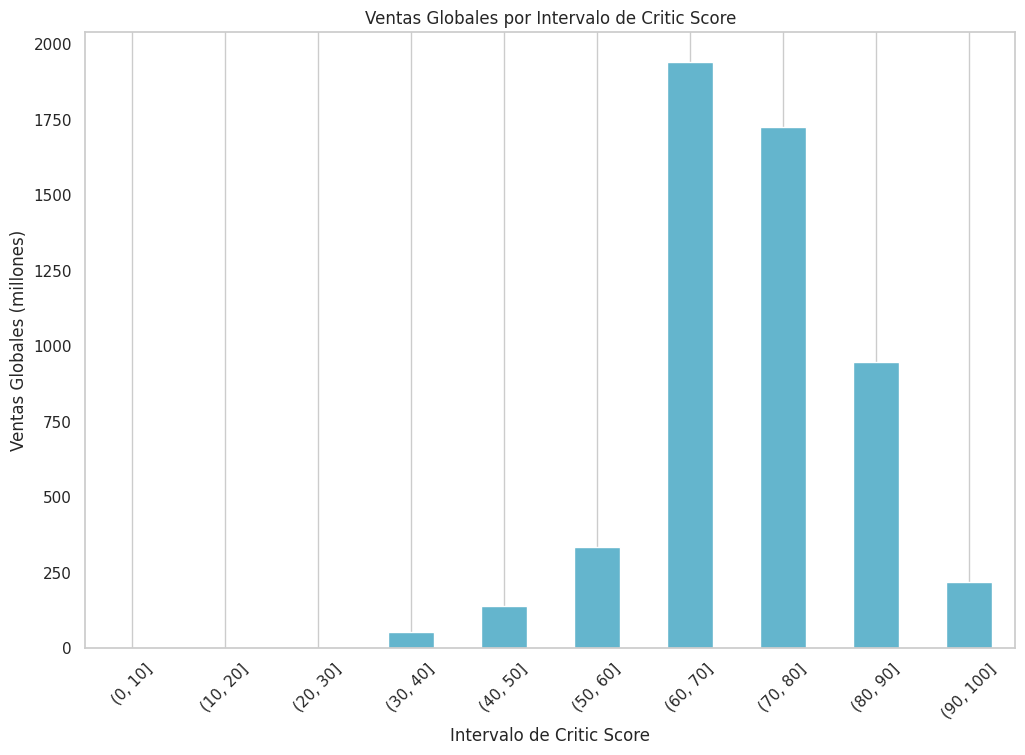

In [34]:
# Crear una nueva columna para los intervalos de Critic_Score
df['Critic_Score_Interval'] = pd.cut(df['Critic_Score'], bins=np.arange(0, 101, 10))

# Agrupar por los intervalos de Critic_Score y sumar las ventas globales
ventas_globales_critic_score = df.groupby('Critic_Score_Interval')['Global_Sales'].sum()

# Crear gráfico de ventas por intervalo de Critic_Score
plt.figure(figsize=(12, 8))
ventas_globales_critic_score.sort_index().plot(kind='bar', color='c')
plt.title('Ventas Globales por Intervalo de Critic Score')
plt.xlabel('Intervalo de Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

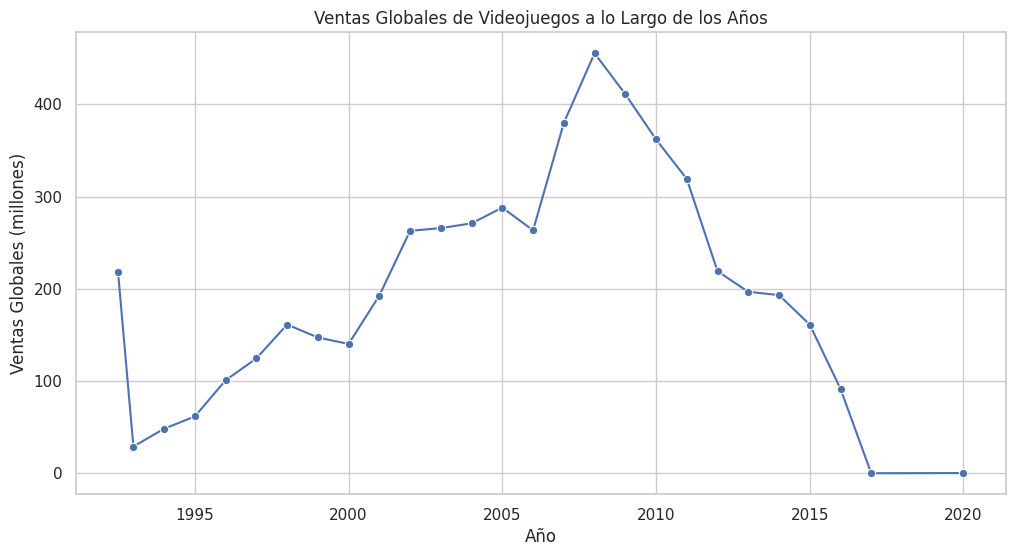

In [35]:
ventas_globales = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_globales, x='Year_of_Release', y='Global_Sales', marker='o')

plt.title('Ventas Globales de Videojuegos a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()


#Ventas regionales despues del tratamiento

En los siguientes graficos se visualizan los datos segun la region, para esto realizare un analisis por cada region.

**Region NA**

En las ventas de videojuegos en la region de Norte America por genero podemos analizar que la mayoria de juegos vendidos pertenecen a juegos de Accion y deportes, esto se puede deber a que los jugadores de NA tienden a jugar videojuegos mas simples y menos complicados como vendria siendo un juego RPG(Role Playing Game) o un juego de estrategia que vienen siendo juegos mas de nicho y complicados de manejar.

**Region EU**

Al igual como pasa con los jugadores de NA, el publico de EU tienden a jugar juegos mas simples, con jugabilidad facil como juegos de Accion, Deportes y Shooters, el mercado Europeo y Norte Americano tienden a ser similares en lo que consumen los jugadores.

**Region JP**

Aqui hay una diferencia con los dos mercados mencionados anteriormente, aqui podemos visualizar que los videojuegos mas vendidos son RPG, esto se debe a que la mayoria de videojuegos de este genero son desarrollados y lanzados primeramente en japon, al ser desarrollados en este mismo pais el publico en la mayoria de ocasiones esta dirigido a los nipones, con una dificultad mas elevada y mas largos en duracion. Sagas de videojuegos como Dragon Quest y Final Fantasy son claro ejemplo de esto.

**Other Region**

Al igual que los mercados de NA y EU, en otras regiones como AL predominan los videojuegos de accion y deportes, por las mismas razones de NA con los tiempos de duracion de los juegos y la dificultad.

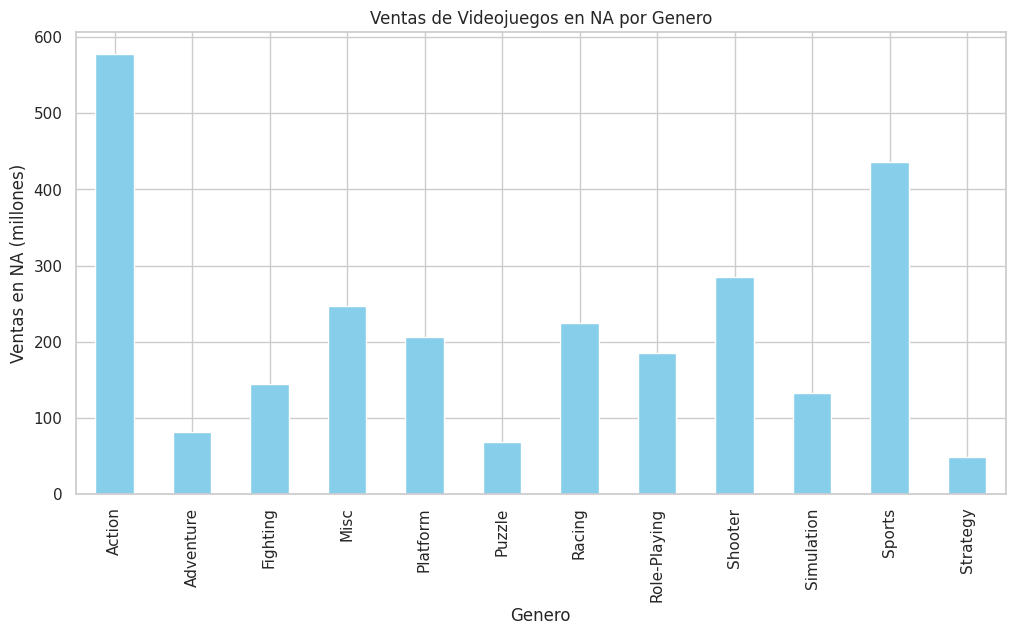

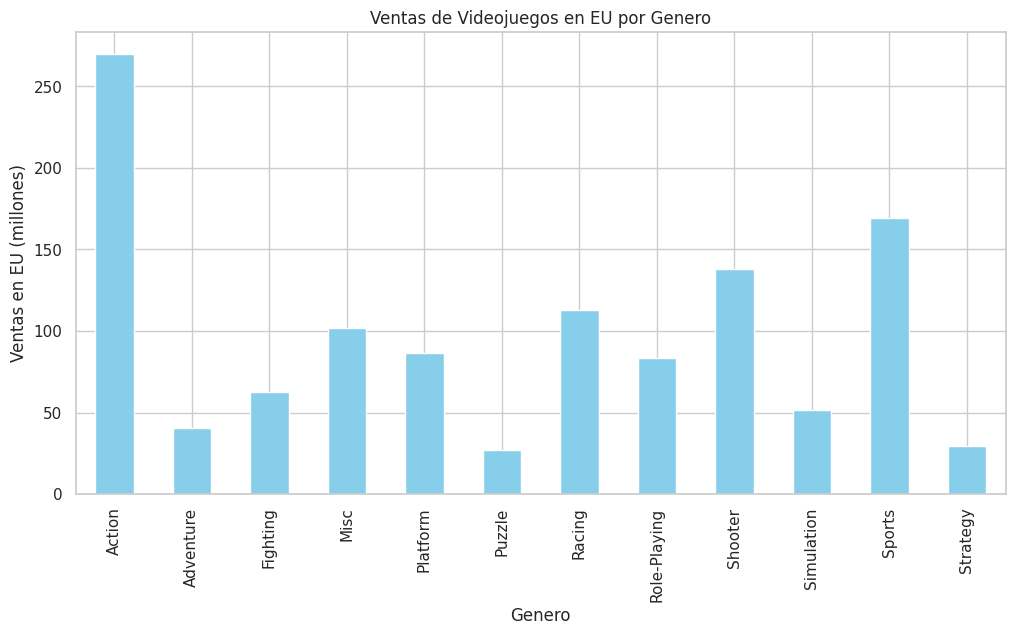

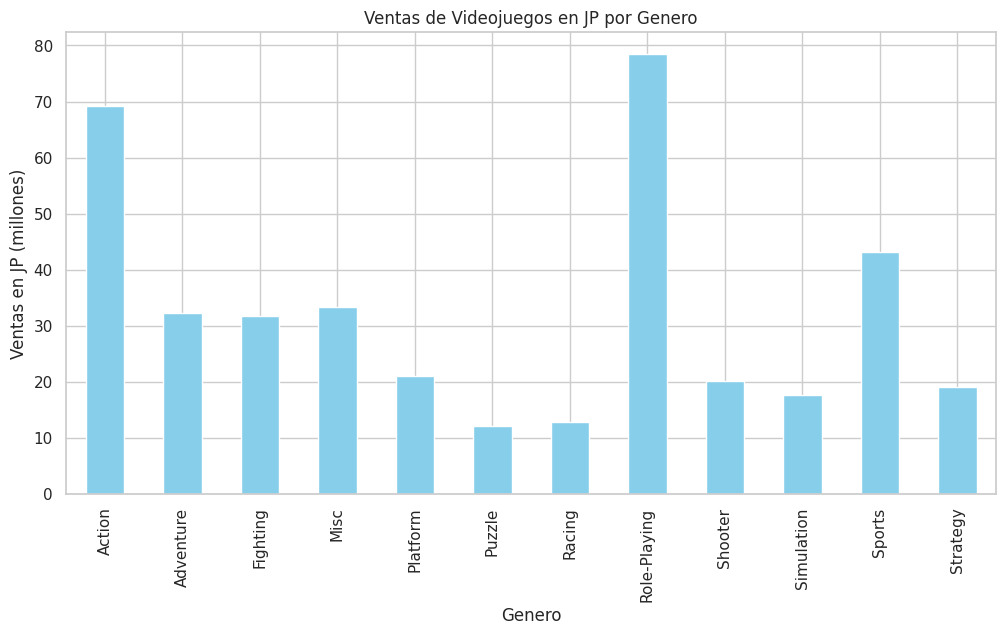

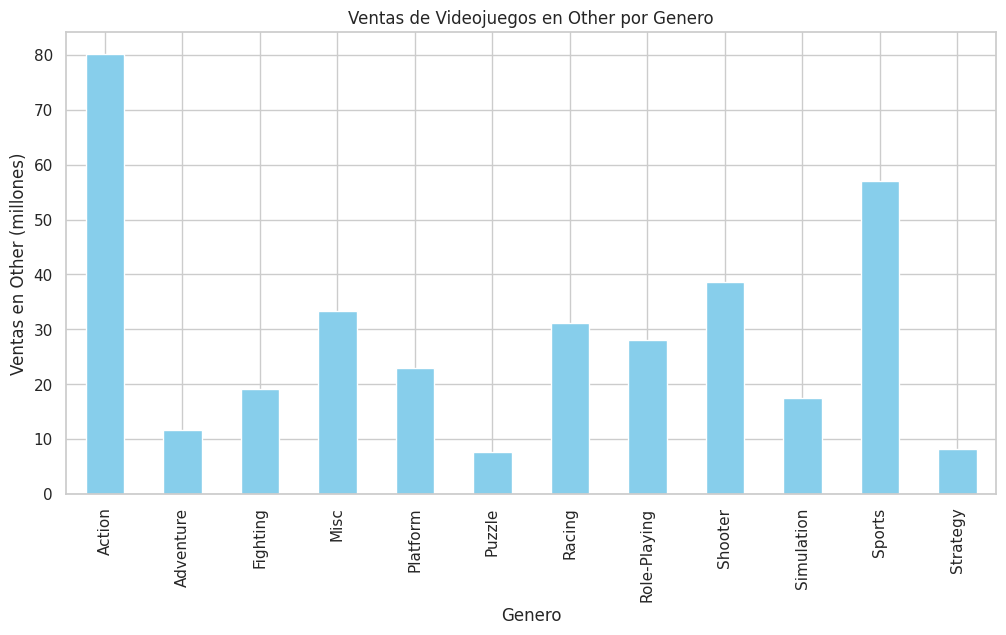

In [36]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Genre')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Genero')
    plt.xlabel('Genero')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

En este grafico podemos analizar la cantidad de ventas que se han realizado en las regiones por plataforma. Para todas las regiones los videojuegos mas vendidos fueron en PS2, esto producto de que es la consola mas vendida de la historia. Se pueden notar algunas diferencias entre regiones como vas ventas en DS en NA o Xbox360.

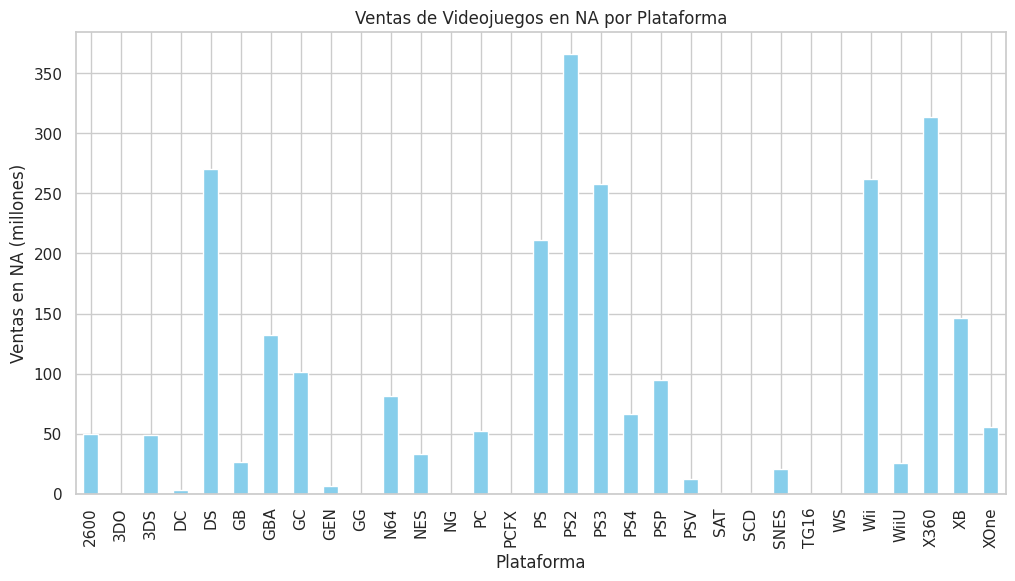

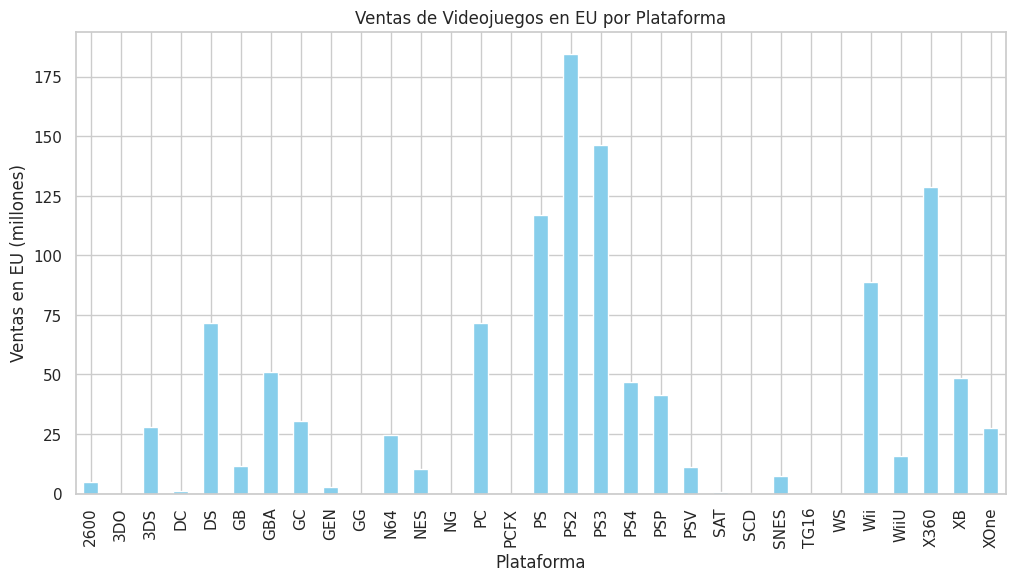

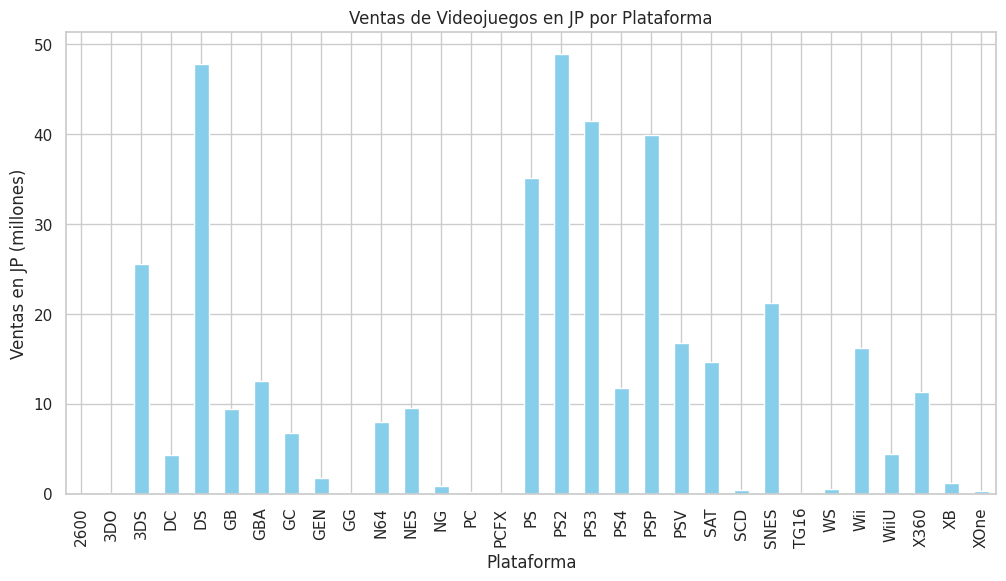

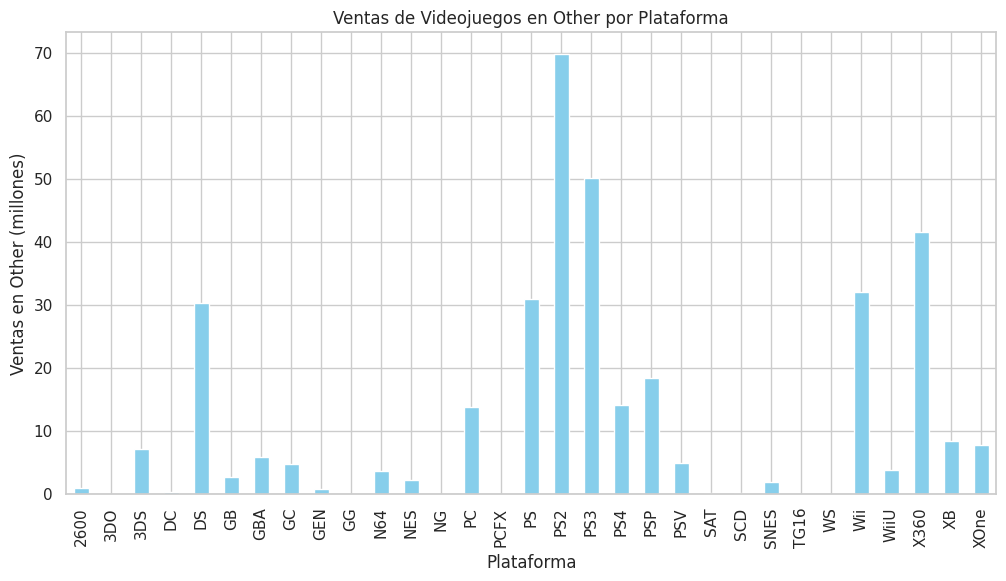

In [37]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Platform')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

Las ventas realizadas por año de lanzamiento en todas las regiones son relativamente similares, siendo los años 2007-2010 mayores en ventas que años posteriores. Las ventas son lideradas por la Region de NA y EU.

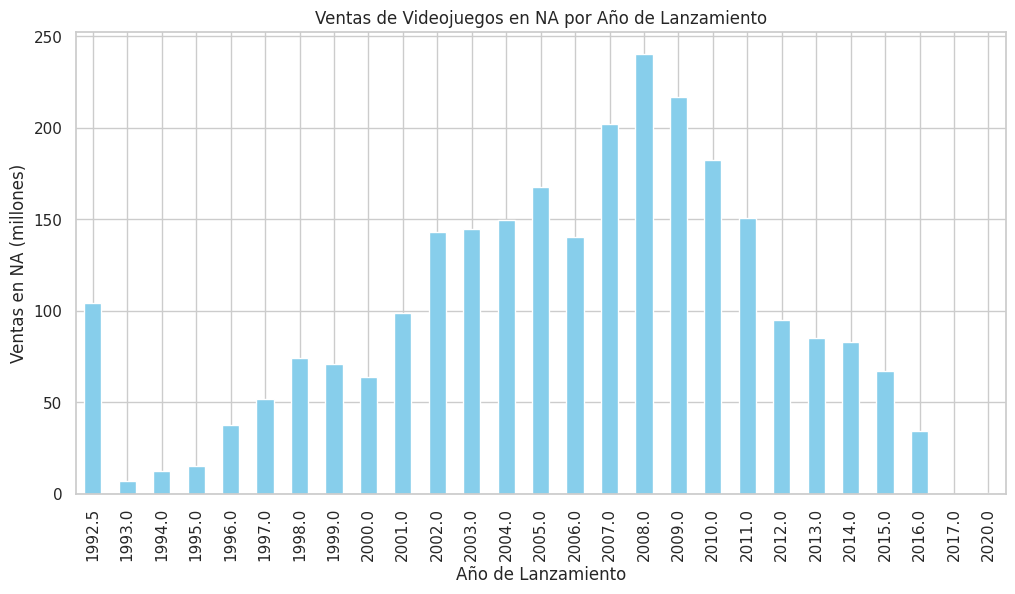

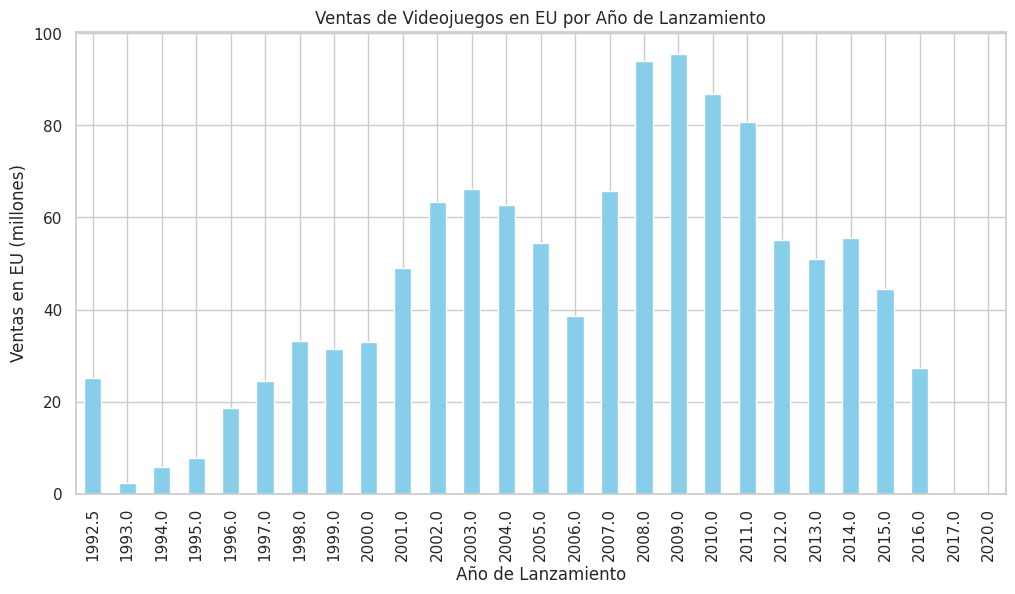

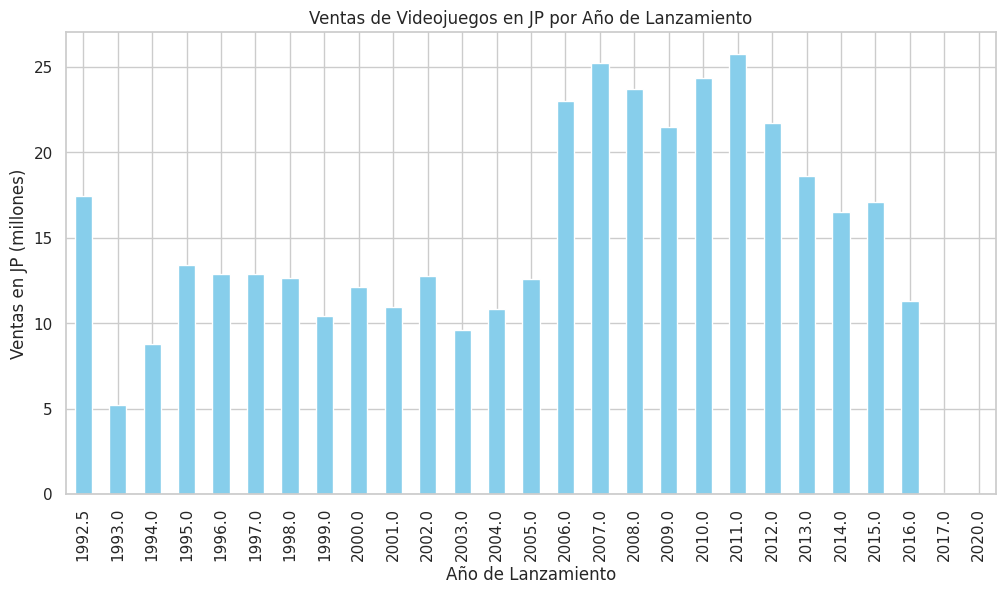

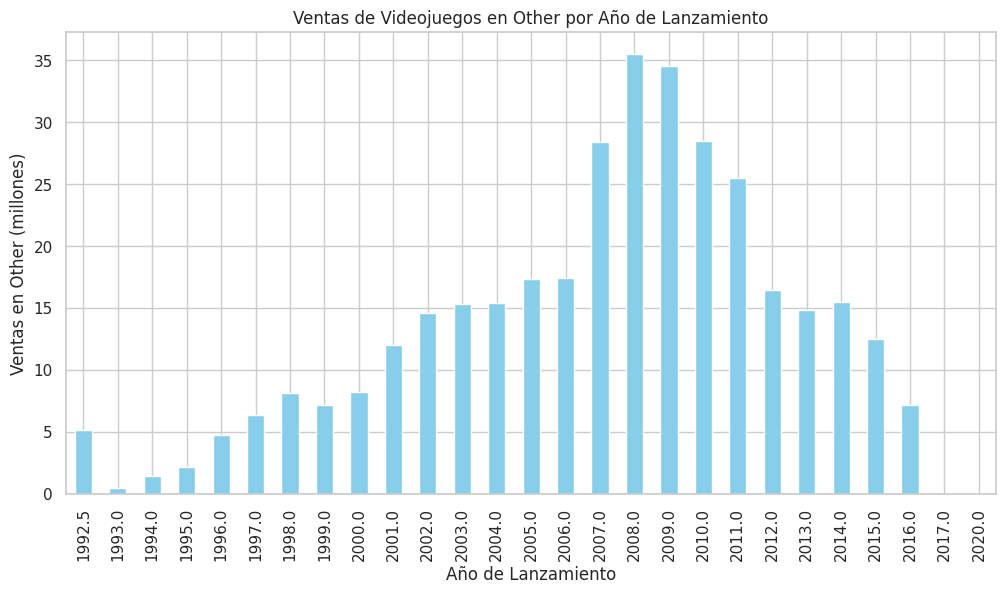

In [38]:
region = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for column in region:
    plt.figure(figsize=(12, 6))
    df.groupby('Year_of_Release')[column].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Ventas de Videojuegos en {column.split("_")[0]} por Año de Lanzamiento')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel(f'Ventas en {column.split("_")[0]} (millones)')
    plt.grid(True)
    plt.show()

Podemos identificar que la mayoria de ventas en todas las regiones se concentran en los intervalos 60-70 de puntuacion, esto producto de que la mayoria de juegos se concentran en estos intervalos. Al igual que en graficos anteriores NA lidera las ventas totales en todos los intervalos.

<ipython-input-39-0f4bc47c99e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critic_Score_Interval'] = pd.cut(df['Critic_Score'], bins=np.arange(0, 101, 10))


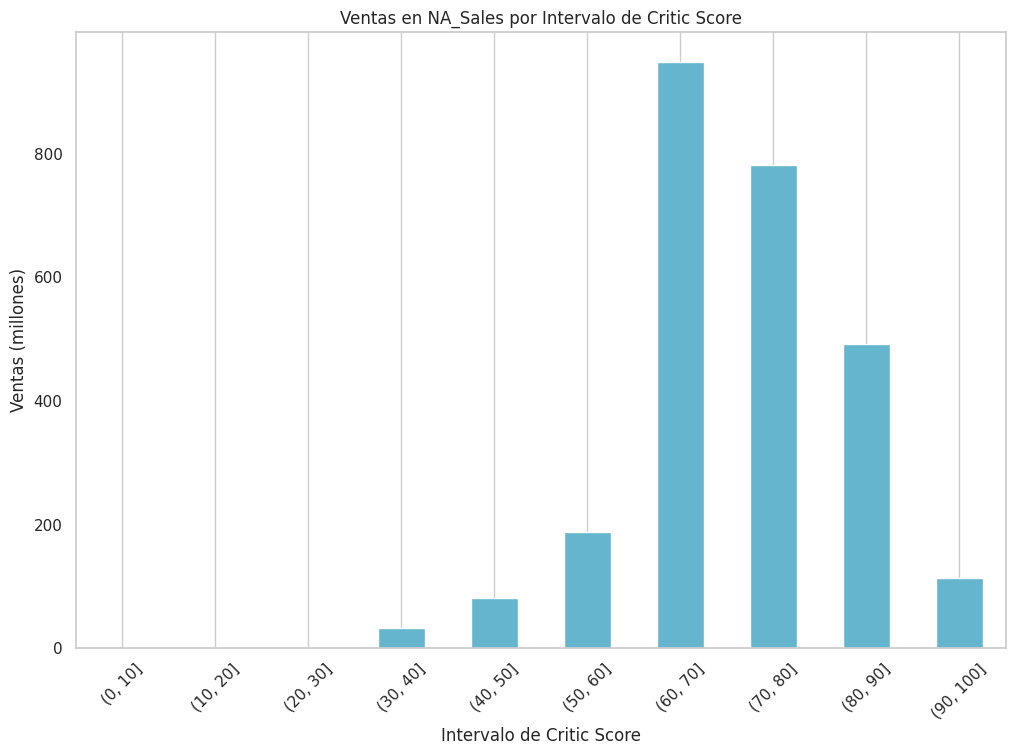

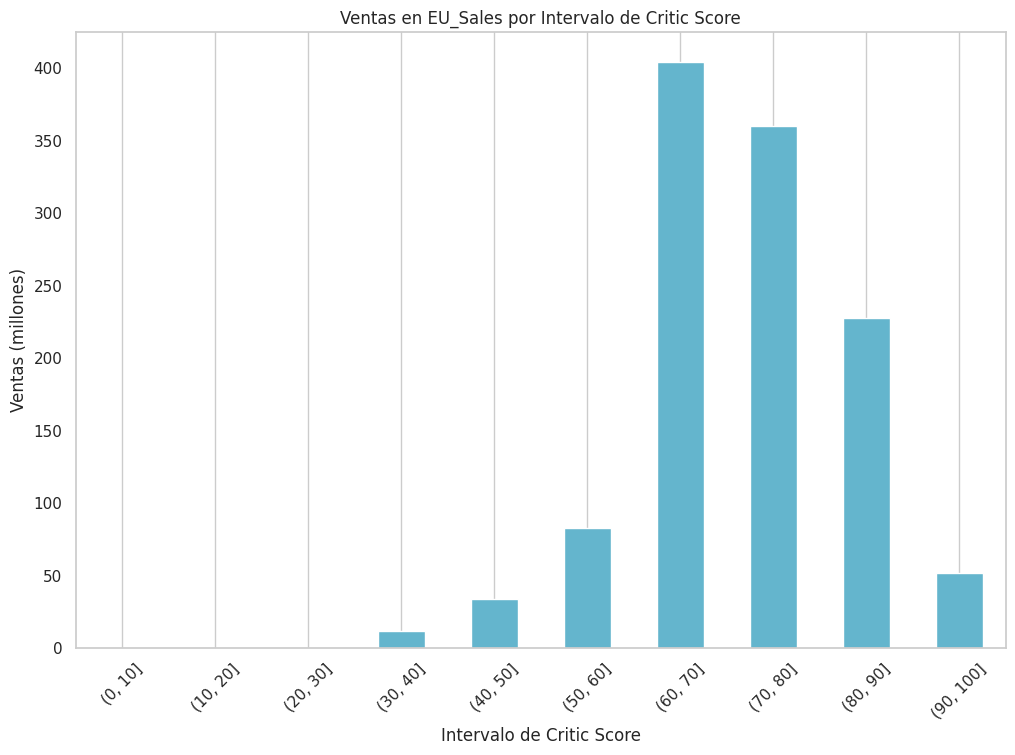

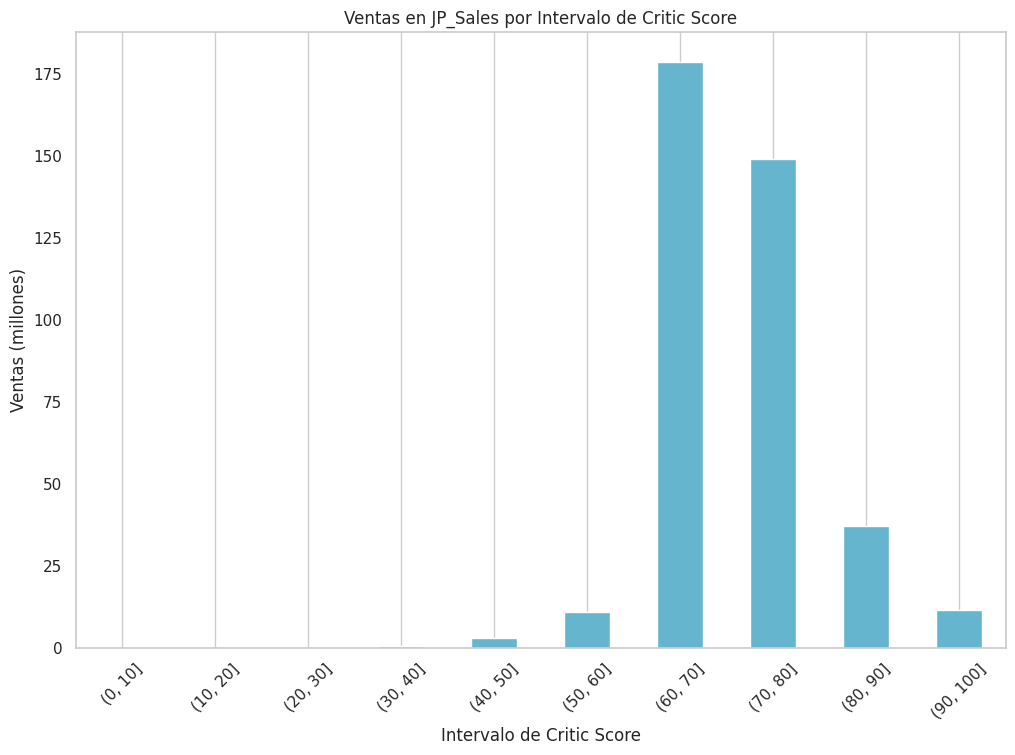

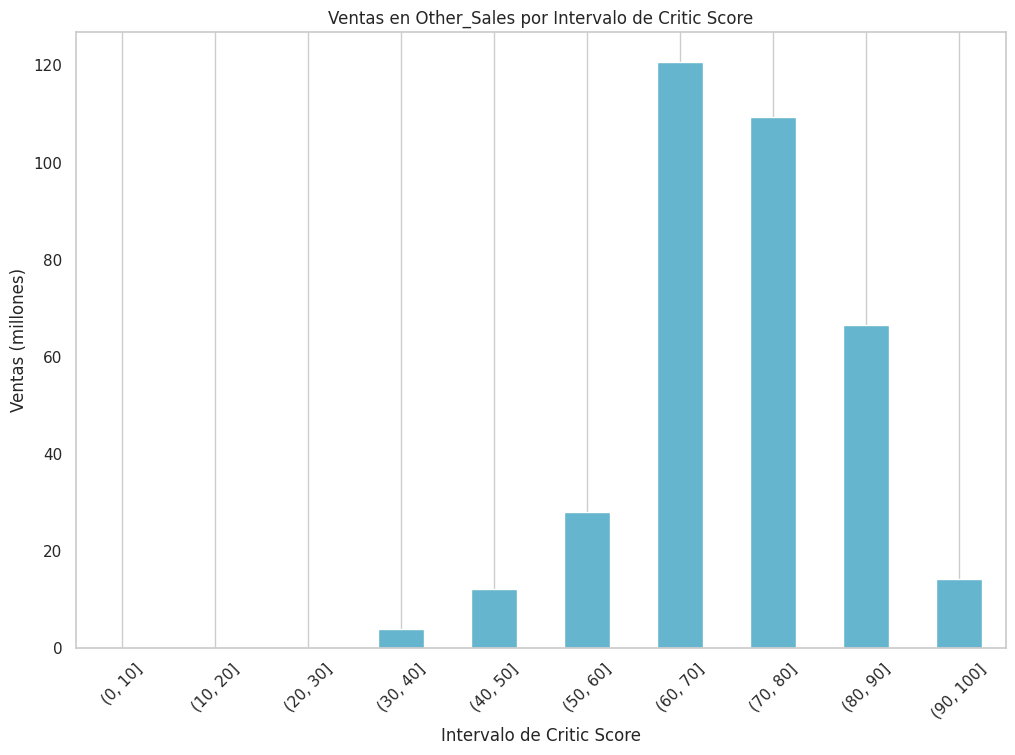

In [39]:
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# Crear una nueva columna para los intervalos de Critic_Score
df['Critic_Score_Interval'] = pd.cut(df['Critic_Score'], bins=np.arange(0, 101, 10))
for column in regions:
    # Agrupar por los intervalos de Critic_Score y sumar las ventas para la región actual
    ventas_globales_critic_score = df.groupby('Critic_Score_Interval')[column].sum()

    # Crear gráfico de ventas por intervalo de Critic_Score para la región actual
    plt.figure(figsize=(12, 8))
    ax = ventas_globales_critic_score.sort_index().plot(kind='bar', color='c')
    plt.title(f'Ventas en {column} por Intervalo de Critic Score')
    plt.xlabel('Intervalo de Critic Score')
    plt.ylabel('Ventas (millones)')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    # Mostrar el gráfico
    plt.show()


Con este grafico podemos analizar que efectivamente NA lidera las ventas a lo largo de los años, es un punto a tener en cuenta dado, que las ventas de Japon son muy bajas teniendo en cuenta lo importante que es el mercado japones en los videojuegos.

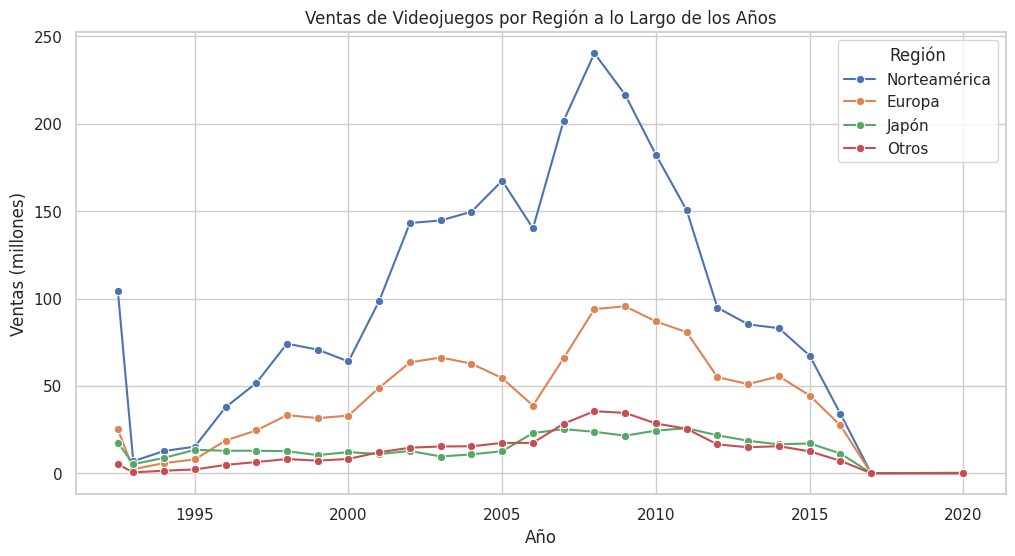

In [40]:
# Agregar las ventas por región y año
regional_sales = df.groupby(['Year_of_Release']).sum(numeric_only=True).reset_index()
plt.figure(figsize=(12, 6))
# Crear un gráfico para cada región
sns.lineplot(data=regional_sales, x='Year_of_Release', y='NA_Sales', marker='o', label='Norteamérica')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='EU_Sales', marker='o', label='Europa')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='JP_Sales', marker='o', label='Japón')
sns.lineplot(data=regional_sales, x='Year_of_Release', y='Other_Sales', marker='o', label='Otros')
plt.title('Ventas de Videojuegos por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.grid(True)
plt.show()

#Mapa de correlacion

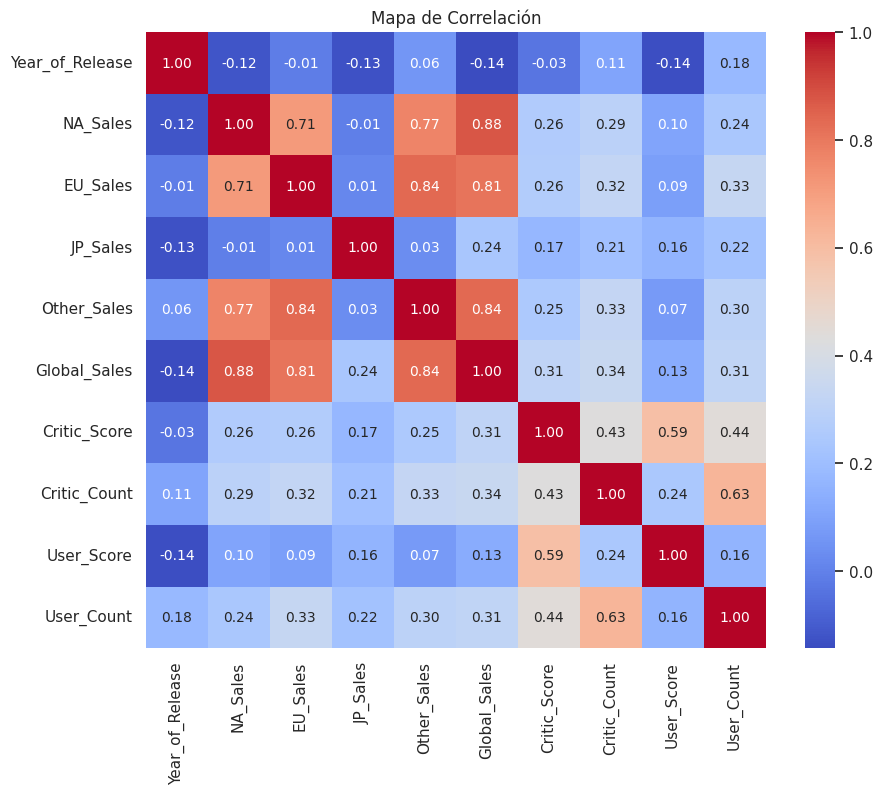

In [41]:
heatmap = df.select_dtypes([int, float]).corr()
#Mapa de Correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Correlación')
plt.show()

#Clustering

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
variables_interes = ['JP_Sales', 'EU_Sales', 'Other_Sales', 'NA_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

X = df[variables_interes]
y = df['Global_Sales']

selector = SelectKBest(score_func=f_classif, k=3)  # Seleccionamos las 5 mejores características
X_new = selector.fit_transform(X, y) # Use X and y instead of Xr and yr

# Obtener los nombres de las características seleccionadas
selected_features = np.array(variables_interes)[selector.get_support()]

print("Características seleccionadas:", selected_features)

Características seleccionadas: ['EU_Sales' 'Other_Sales' 'NA_Sales']


Con este grafico podemos analizar que los clusters de 2 y 3 entregan las metricas mas altas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

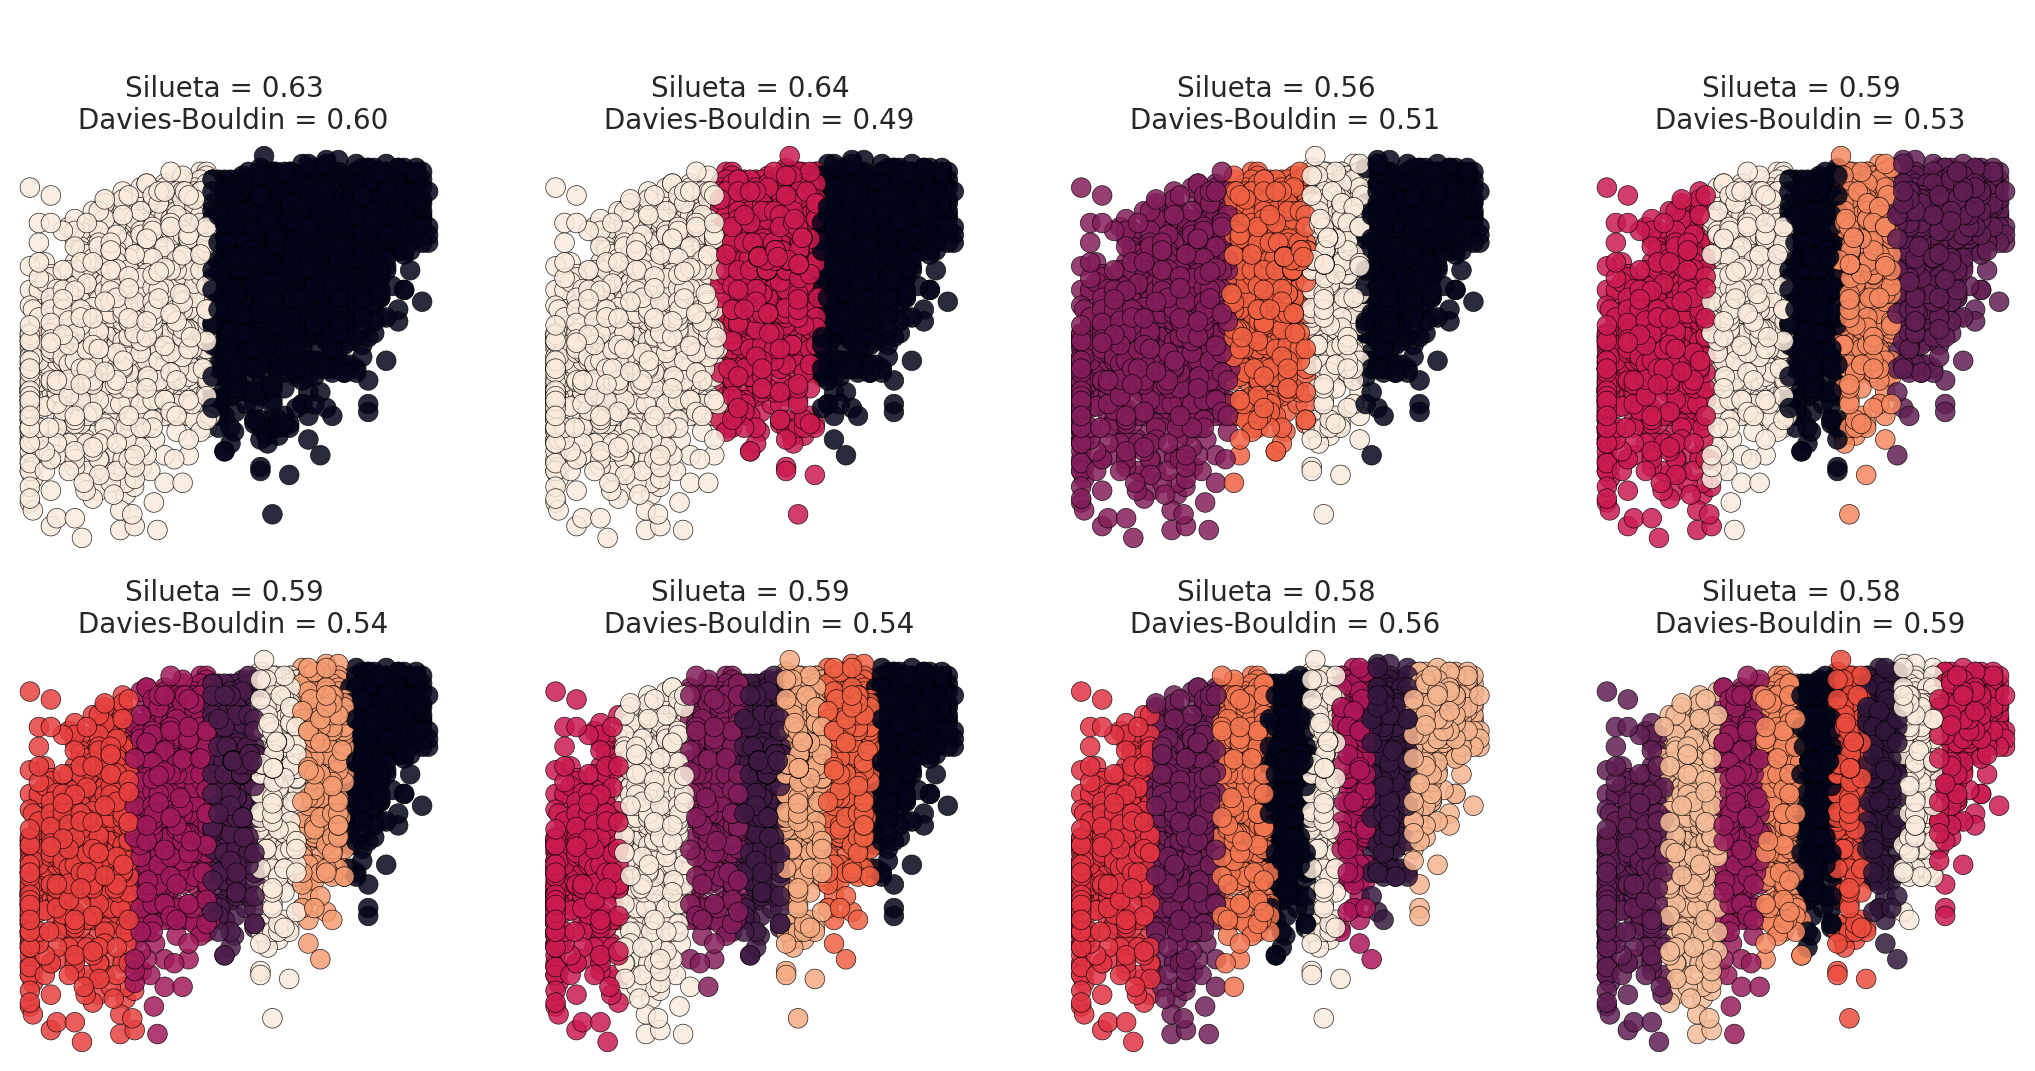

In [46]:
fig = plt.figure(figsize=(26, 12))
columnas_relevantes = ['Critic_Score', 'User_Score']
df_seleccionados = df[columnas_relevantes]
for k in range(2, 10):
    # Creación de clusters
    clusters = KMeans(n_clusters=k, random_state=1)
    clusters.fit_predict(df_seleccionados)
    # Cálculo de métricas
    silueta = silhouette_score(df_seleccionados , clusters.labels_)
    davies_bouldin = davies_bouldin_score(df_seleccionados , clusters.labels_)
    # Graficando clusters
    ax = fig.add_subplot(2, 4, k-1)
    # Use .iloc for integer-location based indexing in Pandas DataFrames
    ax.scatter(df_seleccionados .iloc[clusters.labels_>=0, 0],
               df_seleccionados .iloc[clusters.labels_>=0, 1],
               c=clusters.labels_[clusters.labels_>=0], s=200,
               linewidth=0.5, edgecolors="black", alpha=0.85)
    ax.set_title("\n\nSilueta = %.2f \n Davies-Bouldin = %.2f" %
                 (silueta, davies_bouldin), fontsize=20)
    ax.axis("off")

plt.show()

Podemos observar que el cluster 2 tiene mejor puntaje, mientras que 3 clusters tiene un puntaje mas bajo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

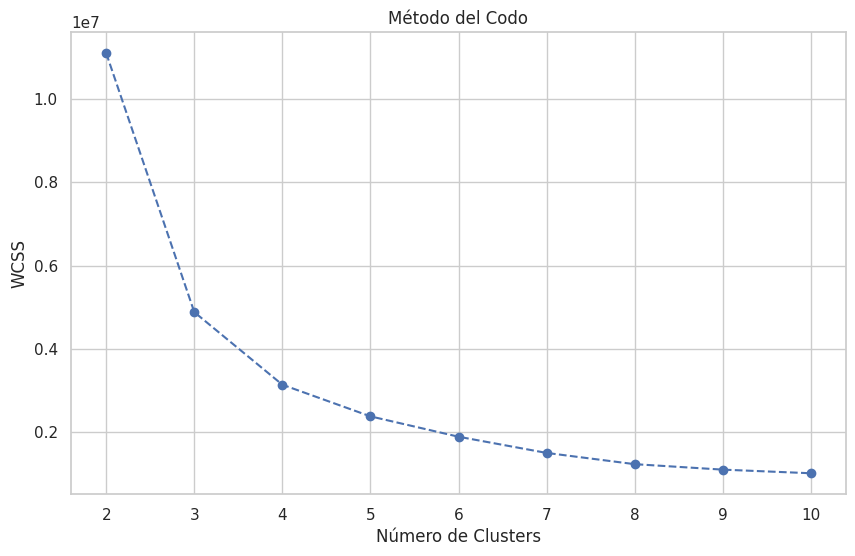

In [44]:
wcss = []  #Puntaje del codo
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_seleccionados)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()


Al igual como vimos en el primer grafico y en el anterior, 2 clusters tienen las metricas mas altas, seguido por 3 clusters que no se queda atras y aun asi tiene muy buenas metricas.

In [45]:
# Rango de número de clusters
k_values = range(2, 11)  # Puedes ajustar este rango según tus necesidades

# Calcula el índice de silueta para diferentes valores de k
silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(df_seleccionados)
    silhouette_avg = silhouette_score(df_seleccionados, labels)
    silhouette_scores.append(silhouette_avg)

# Grafica del índice de silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Gráfico del Índice de Silueta para Agglomerative Clustering')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.show()

KeyboardInterrupt: 

Finalmente decidi utilizar 3 clusters aun cuando el cluster 2 tiene mejores metricas, el cluster 3 tiene metricas realmente buenas, a pesar de las buenas metricas del cluster 2 prefiero optar por la segmentacion que me otorgaria un cluster de 3 que me pueda proporcionar insights mas detallados y segmentos del mercado.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_seleccionados)

clusters = kmeans.labels_

# Añadir las etiquetas al dataframe original
df['Cluster'] = clusters

Finalmente en este grafico podemos observar distintos patrones y segmentos, como una mayor cantidad de ventas en japon representan una menor cantidad de ventas globales, asi como otros con ventas globales altas pero bajas en japon. Tambien se puede ver una tendencia general de mayores ventas globales asociada con altas ventas en japon.

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Critic_Score', y='User_Score', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de ventas de videojuegos')
plt.xlabel('Critic_Score')
plt.ylabel('User_Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Análisis de patrones - Convert columns to numeric if needed
cluster_summary = df.groupby('Cluster').agg({'Critic_Score': 'mean', 'User_Score': 'mean'})
# Use .agg to specify aggregation for each column
print(cluster_summary)

#Conclusion

Como conclusion al trabajo realizado, puedo recomendar mejorar el tratamiento de valores nulos para variables categoricas, especificamente un modelo de regresion logistica que realice predicciones de los valores nulos para esas variables, esto mejoraria inmensamente la calidad del modelo, dado que en variables categoricas se imputaron como valores desconocidos.

Insights recomendados para una posible modelo de regresion logistica para la variable Developer:

Platform: La plataforma seria una caracteristica importante para determinar el desarrollador, dado que ciertos desarrolladores solo trabajan para plataformas especificas.

Publisher: Entrega mucha informacion dado que muchos developers son tambien publishers en si mismos.

Genre: El genero tambien aporta mucha informacion dado que los developers suelen centrarse en un solo tipo de genero en sus proyectos.